# Palantir Part 1

In [1]:
 # source ~/venv-jlab/bin/activate

using: https://palantir.readthedocs.io/en/latest/notebooks/Palantir_sample_notebook.html

In [2]:
import palantir
import scanpy as sc
import pandas as pd
import os

# Plotting
import matplotlib
import matplotlib.pyplot as plt

# warnings
import warnings
from numba.core.errors import NumbaDeprecationWarning

warnings.filterwarnings(action="ignore", category=NumbaDeprecationWarning)
warnings.filterwarnings(
    action="ignore", module="scanpy", message="No data for colormapping"
)

# Inline plotting
%matplotlib inline

In [3]:
cmo_full = sc.read('./cmov3.h5ad')
cmo_full

AnnData object with n_obs × n_vars = 71107 × 27998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CMO', 'nFeature_CMO', 'CellRanger_Assignment', 'percent.mt', 'percent.ribo', 'sample_id', 'nFeature_nCount_0_9_ratio', 'scDblFinder_score', 'S.Score', 'G2M.Score', 'Phase', 'scran_sizeFactors', 'Samples', 'Conditions', 'origin', 'Lane', 'ident', 'Phasel', 'lv_groups', 'ch_lv_groups', 'lv_clusters', 'ch_lv_clusters', 'lv_subclusters', 'ch_lv_subclusters', 'cl_1', 'cl_2', 'cl_3', 'Conditions_lv', 'Samples_lv', 'ch_Conditions_lv', 'ch_Samples_lv', 'score_hoxa', 'score_hoxb', 'score_hoxc', 'score_hoxd', 'cl_4', 'cl_4_ch', 'no_cl1', 'no_cl2', 'no_cl3', 'v4k_pca50_predicted.id', 'v4k_pca50_prediction.score.max', 'v4k_pca75_predicted.id', 'v4k_pca75_prediction.score.max', 'v4k_pca100_predicted.id', 'v4k_pca100_prediction.score.max', 'v7k_pca50_predicted.id', 'v7k_pca50_prediction.score.max', 'v7k_pca75_predicted.id', 'v7k_pca75_prediction.score.max', 'v7k_pca100_predicted.id', 'v7k_

In [279]:
# List all unique cell types in 'cell_type_clusters_ch'
print(cmo_full.obs['cell_type_clusters_ch'].unique())


['Naive Pluripotency' 'Epic/Mesen 2' 'Limb Mesoderm 2'
 'Allan/Mesen/Epic 1' 'Allantois' 'EMP 4' 'Primitive Streak' 'Mesen/Allan'
 'Allan/Mesen/Epic 2' 'EMP 2' 'Mesenchyme 2' 'Nascent Mesoderm'
 'Erythroid 1' 'Endocardium' 'Epicar/Mesen 1' 'EMP 3'
 'Lateral Plate Mesoderm' 'Limb Mesoderm 1' 'Erythroid 4' 'PGC' 'Epiblast'
 'Amniotic Ectoderm 2' 'Erythroid 3' 'HEP/BP' 'Epicardium' 'Endothelium 2'
 'Mesenchyme 1' 'Anterior Primitive Streak' 'MkP 2' 'Amniotic Ectoderm 1'
 'Endothelium 1' 'Primitive Streak 1' 'MkP 1' 'MkP/MEP' 'Endothelium 3'
 'Erythroid 2' 'Visceral Endoderm' 'Amniotic Ectoderm 3'
 'Atf3-KO Abundant' 'EMP 1']


In [280]:
# List all unique cell types in 'cell_type_clusters_ch'
print(cmo_full.obs['cell_type_subclusters_ch'].unique())


['Naive Pluripotency' 'Epic/Mesen 2' 'Limb Mesoderm 2'
 'Allan/Mesen/Epic 1' 'Allantois' 'EMP 4' 'Primitive Streak' 'Mesen/Allan'
 'Allan/Mesen/Epic 2' 'EMP 2' 'Mesenchyme 2' 'Nascent Mesoderm'
 'Erythroid 1' 'Endocardium' 'Epicar/Mesen 1' 'EMP 3'
 'Lateral Plate Mesoderm' 'Limb Mesoderm 1' 'Erythroid 4' 'PGC' 'Epiblast'
 'Amniotic Ectoderm 2' 'Erythroid 3' 'HEP/BP' 'Epicardium' 'Endothelium 2'
 'Mesenchyme 1' 'Anterior Primitive Streak' 'MkP 2' 'Amniotic Ectoderm 1'
 'Endothelium 1' 'Primitive Streak 1' 'MkP 1' 'MkP/MEP' 'Endothelium 3'
 'Erythroid 2' 'Visceral Endoderm' 'Amniotic Ectoderm 3'
 'Atf3-KO Abundant' 'EMP 1']


In [281]:
cmo_full

AnnData object with n_obs × n_vars = 71107 × 27998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CMO', 'nFeature_CMO', 'CellRanger_Assignment', 'percent.mt', 'percent.ribo', 'sample_id', 'nFeature_nCount_0_9_ratio', 'scDblFinder_score', 'S.Score', 'G2M.Score', 'Phase', 'scran_sizeFactors', 'Samples', 'Conditions', 'origin', 'Lane', 'ident', 'Phasel', 'lv_groups', 'ch_lv_groups', 'lv_clusters', 'ch_lv_clusters', 'lv_subclusters', 'ch_lv_subclusters', 'cl_1', 'cl_2', 'cl_3', 'Conditions_lv', 'Samples_lv', 'ch_Conditions_lv', 'ch_Samples_lv', 'score_hoxa', 'score_hoxb', 'score_hoxc', 'score_hoxd', 'cl_4', 'cl_4_ch', 'no_cl1', 'no_cl2', 'no_cl3', 'v4k_pca50_predicted.id', 'v4k_pca50_prediction.score.max', 'v4k_pca75_predicted.id', 'v4k_pca75_prediction.score.max', 'v4k_pca100_predicted.id', 'v4k_pca100_prediction.score.max', 'v7k_pca50_predicted.id', 'v7k_pca50_prediction.score.max', 'v7k_pca75_predicted.id', 'v7k_pca75_prediction.score.max', 'v7k_pca100_predicted.id', 'v7k_

In [240]:
remove_types = [
    'Visceral Endoderm',
    'Amniotic Ectoderm 3',
    'PGC',
    'Amniotic Ectoderm 2',
    'Amniotic Ectoderm 1',
    'Anterior Primitive Streak'
]

# Create a filtered AnnData object excluding these types
cmo = cmo_full[~cmo_full.obs['cell_type_clusters_ch'].isin(remove_types)].copy()


In [241]:
cmo

AnnData object with n_obs × n_vars = 69174 × 27998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CMO', 'nFeature_CMO', 'CellRanger_Assignment', 'percent.mt', 'percent.ribo', 'sample_id', 'nFeature_nCount_0_9_ratio', 'scDblFinder_score', 'S.Score', 'G2M.Score', 'Phase', 'scran_sizeFactors', 'Samples', 'Conditions', 'origin', 'Lane', 'ident', 'Phasel', 'lv_groups', 'ch_lv_groups', 'lv_clusters', 'ch_lv_clusters', 'lv_subclusters', 'ch_lv_subclusters', 'cl_1', 'cl_2', 'cl_3', 'Conditions_lv', 'Samples_lv', 'ch_Conditions_lv', 'ch_Samples_lv', 'score_hoxa', 'score_hoxb', 'score_hoxc', 'score_hoxd', 'cl_4', 'cl_4_ch', 'no_cl1', 'no_cl2', 'no_cl3', 'v4k_pca50_predicted.id', 'v4k_pca50_prediction.score.max', 'v4k_pca75_predicted.id', 'v4k_pca75_prediction.score.max', 'v4k_pca100_predicted.id', 'v4k_pca100_prediction.score.max', 'v7k_pca50_predicted.id', 'v7k_pca50_prediction.score.max', 'v7k_pca75_predicted.id', 'v7k_pca75_prediction.score.max', 'v7k_pca100_predicted.id', 'v7k_

In [284]:
# List all unique cell types in 'cell_type_clusters_ch'
print(cmo.obs['ch_lv_clusters'].unique())


['Naive', 'Mesoderm_Hoxb', 'Mesoderm_Hoxa', 'EMP', 'Primitive_Streak', ..., 'Endothelium', 'Epiblast', 'Blood_Progenitors', 'Megakaryocyte', 'Mesoderm_Ifit1']
Length: 12
Categories (12, object): ['Blood_Progenitors', 'EMP', 'Endothelium', 'Epiblast', ..., 'Mesoderm_Ifit1', 'Mesoderm_Mixl1', 'Naive', 'Primitive_Streak']


In [288]:
remove_types = [
'Mesoderm_Hoxb', 'Mesoderm_Hoxa','Mesoderm_Ifit1'
]

# Create a filtered AnnData object excluding these types
cmo = cmo[~cmo.obs['ch_lv_clusters'].isin(remove_types)].copy()


In [289]:
cmo

AnnData object with n_obs × n_vars = 14124 × 27998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CMO', 'nFeature_CMO', 'CellRanger_Assignment', 'percent.mt', 'percent.ribo', 'sample_id', 'nFeature_nCount_0_9_ratio', 'scDblFinder_score', 'S.Score', 'G2M.Score', 'Phase', 'scran_sizeFactors', 'Samples', 'Conditions', 'origin', 'Lane', 'ident', 'Phasel', 'lv_groups', 'ch_lv_groups', 'lv_clusters', 'ch_lv_clusters', 'lv_subclusters', 'ch_lv_subclusters', 'cl_1', 'cl_2', 'cl_3', 'Conditions_lv', 'Samples_lv', 'ch_Conditions_lv', 'ch_Samples_lv', 'score_hoxa', 'score_hoxb', 'score_hoxc', 'score_hoxd', 'cl_4', 'cl_4_ch', 'no_cl1', 'no_cl2', 'no_cl3', 'v4k_pca50_predicted.id', 'v4k_pca50_prediction.score.max', 'v4k_pca75_predicted.id', 'v4k_pca75_prediction.score.max', 'v4k_pca100_predicted.id', 'v4k_pca100_prediction.score.max', 'v7k_pca50_predicted.id', 'v7k_pca50_prediction.score.max', 'v7k_pca75_predicted.id', 'v7k_pca75_prediction.score.max', 'v7k_pca100_predicted.id', 'v7k_

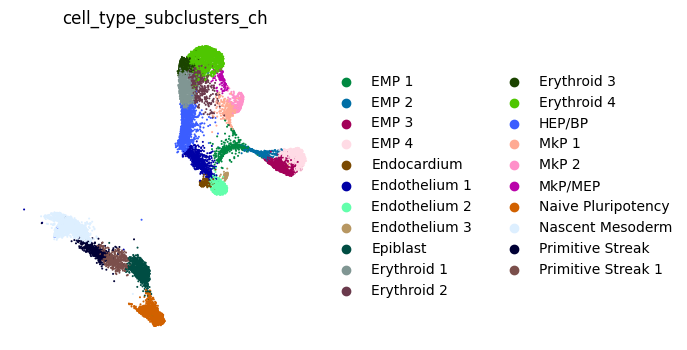

In [290]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    cmo,
    basis="X_UMAP",
        color='cell_type_subclusters_ch',
    frameon=False,
)

In [291]:
sc.pp.normalize_per_cell(cmo)

/tmp/ipykernel_36847/3003711068.py:1: FutureWarning: Use sc.pp.normalize_total instead
  sc.pp.normalize_per_cell(cmo)
/home/ridvan/venv-jlab/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:591: FutureWarning: Use sc.pp.normalize_total instead
  normalize_per_cell(


In [292]:
palantir.preprocess.log_transform(cmo)

In [294]:
sc.pp.highly_variable_genes(cmo, n_top_genes=4000)

In [295]:
sc.pp.pca(cmo)

In [296]:
cmo

AnnData object with n_obs × n_vars = 14124 × 27998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CMO', 'nFeature_CMO', 'CellRanger_Assignment', 'percent.mt', 'percent.ribo', 'sample_id', 'nFeature_nCount_0_9_ratio', 'scDblFinder_score', 'S.Score', 'G2M.Score', 'Phase', 'scran_sizeFactors', 'Samples', 'Conditions', 'origin', 'Lane', 'ident', 'Phasel', 'lv_groups', 'ch_lv_groups', 'lv_clusters', 'ch_lv_clusters', 'lv_subclusters', 'ch_lv_subclusters', 'cl_1', 'cl_2', 'cl_3', 'Conditions_lv', 'Samples_lv', 'ch_Conditions_lv', 'ch_Samples_lv', 'score_hoxa', 'score_hoxb', 'score_hoxc', 'score_hoxd', 'cl_4', 'cl_4_ch', 'no_cl1', 'no_cl2', 'no_cl3', 'v4k_pca50_predicted.id', 'v4k_pca50_prediction.score.max', 'v4k_pca75_predicted.id', 'v4k_pca75_prediction.score.max', 'v4k_pca100_predicted.id', 'v4k_pca100_prediction.score.max', 'v7k_pca50_predicted.id', 'v7k_pca50_prediction.score.max', 'v7k_pca75_predicted.id', 'v7k_pca75_prediction.score.max', 'v7k_pca100_predicted.id', 'v7k_

In [334]:
# Run diffusion maps
dm_res = palantir.utils.run_diffusion_maps(cmo, n_components=30)

In [335]:
ms_data = palantir.utils.determine_multiscale_space(cmo)

In [336]:
sc.pp.neighbors(cmo)
sc.tl.umap(cmo)

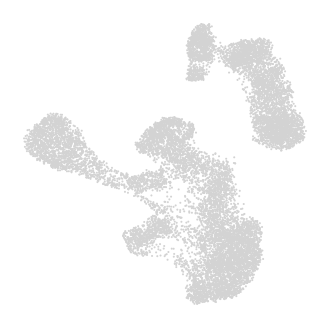

In [337]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    cmo,
    basis="umap",
    frameon=False,
)

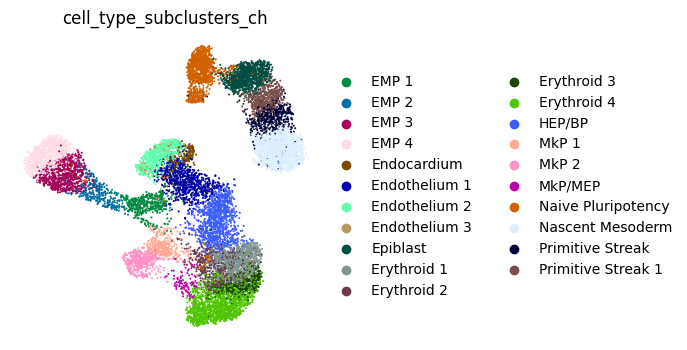

In [338]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    cmo,
    basis="umap",
        color='cell_type_subclusters_ch',
    frameon=False,
)

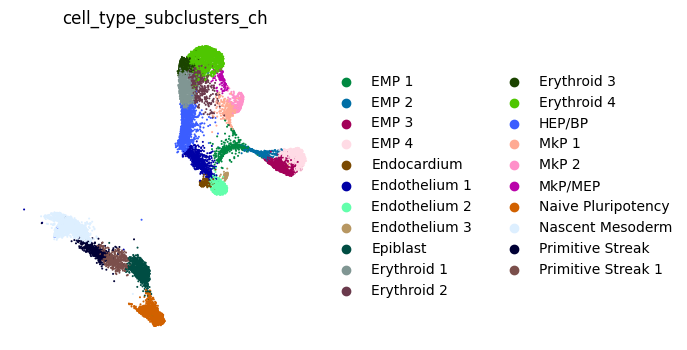

In [339]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    cmo,
    basis="X_UMAP",
        color='cell_type_subclusters_ch',
    frameon=False,
)

In [340]:
imputed_X = palantir.utils.run_magic_imputation(cmo,n_jobs=12)

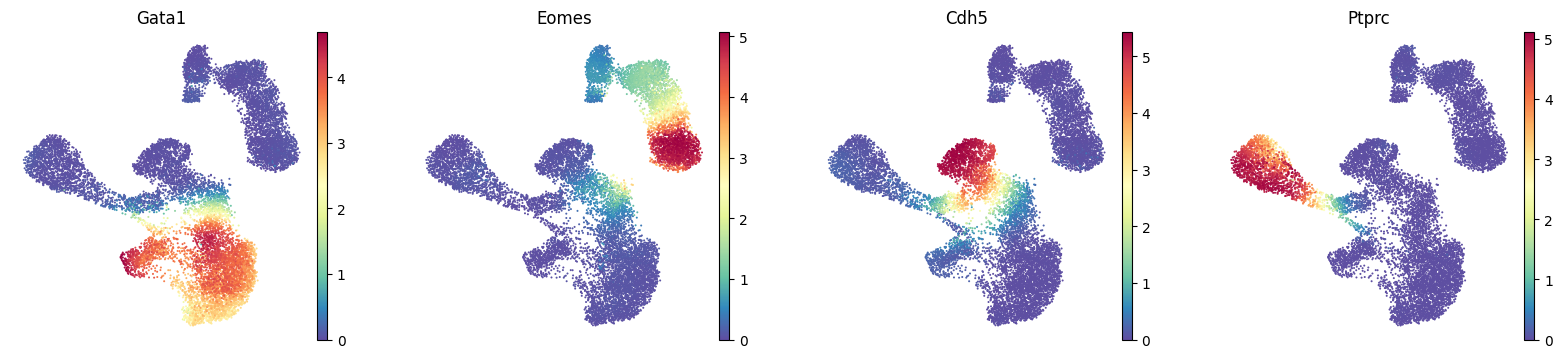

In [341]:
sc.pl.embedding(
    cmo,
    basis="umap",
    layer="MAGIC_imputed_data",
    color=["Gata1", "Eomes", "Cdh5", "Ptprc"],
    frameon=False,
)
plt.show()

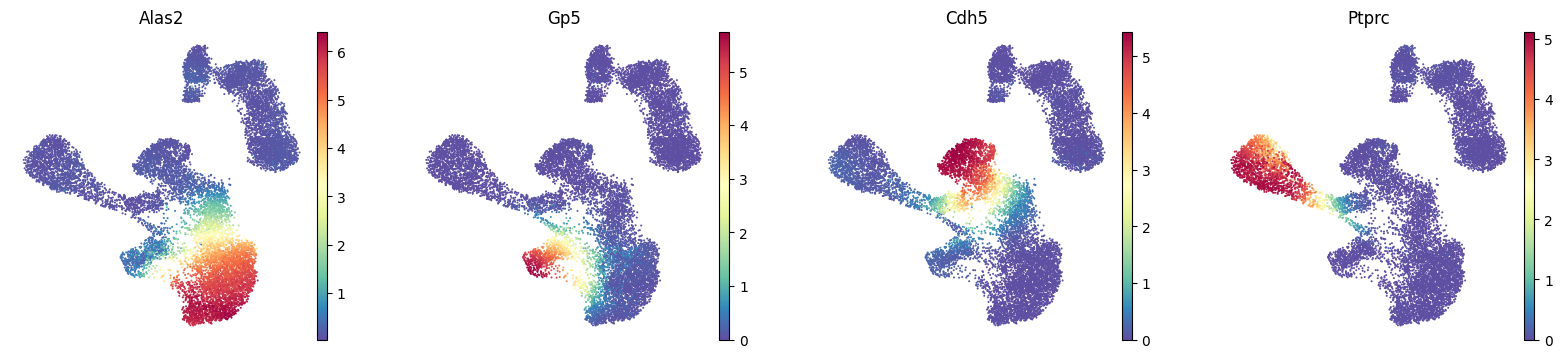

In [342]:
sc.pl.embedding(
    cmo,
    basis="umap",
    layer="MAGIC_imputed_data",
    color=["Alas2", "Gp5", "Cdh5", "Ptprc"],
    frameon=False,
)
plt.show()

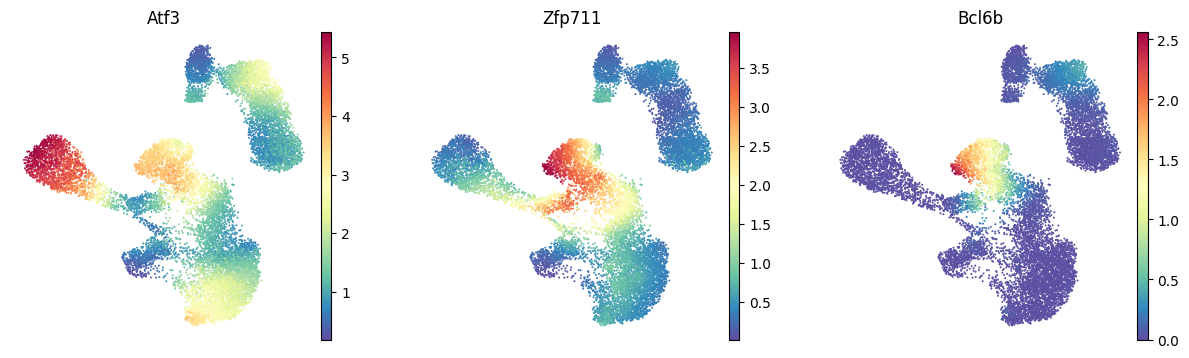

In [343]:
sc.pl.embedding(
    cmo,
    basis="umap",
    layer="MAGIC_imputed_data",
    color=["Atf3", "Zfp711", "Bcl6b"],
    frameon=False,
)
plt.show()

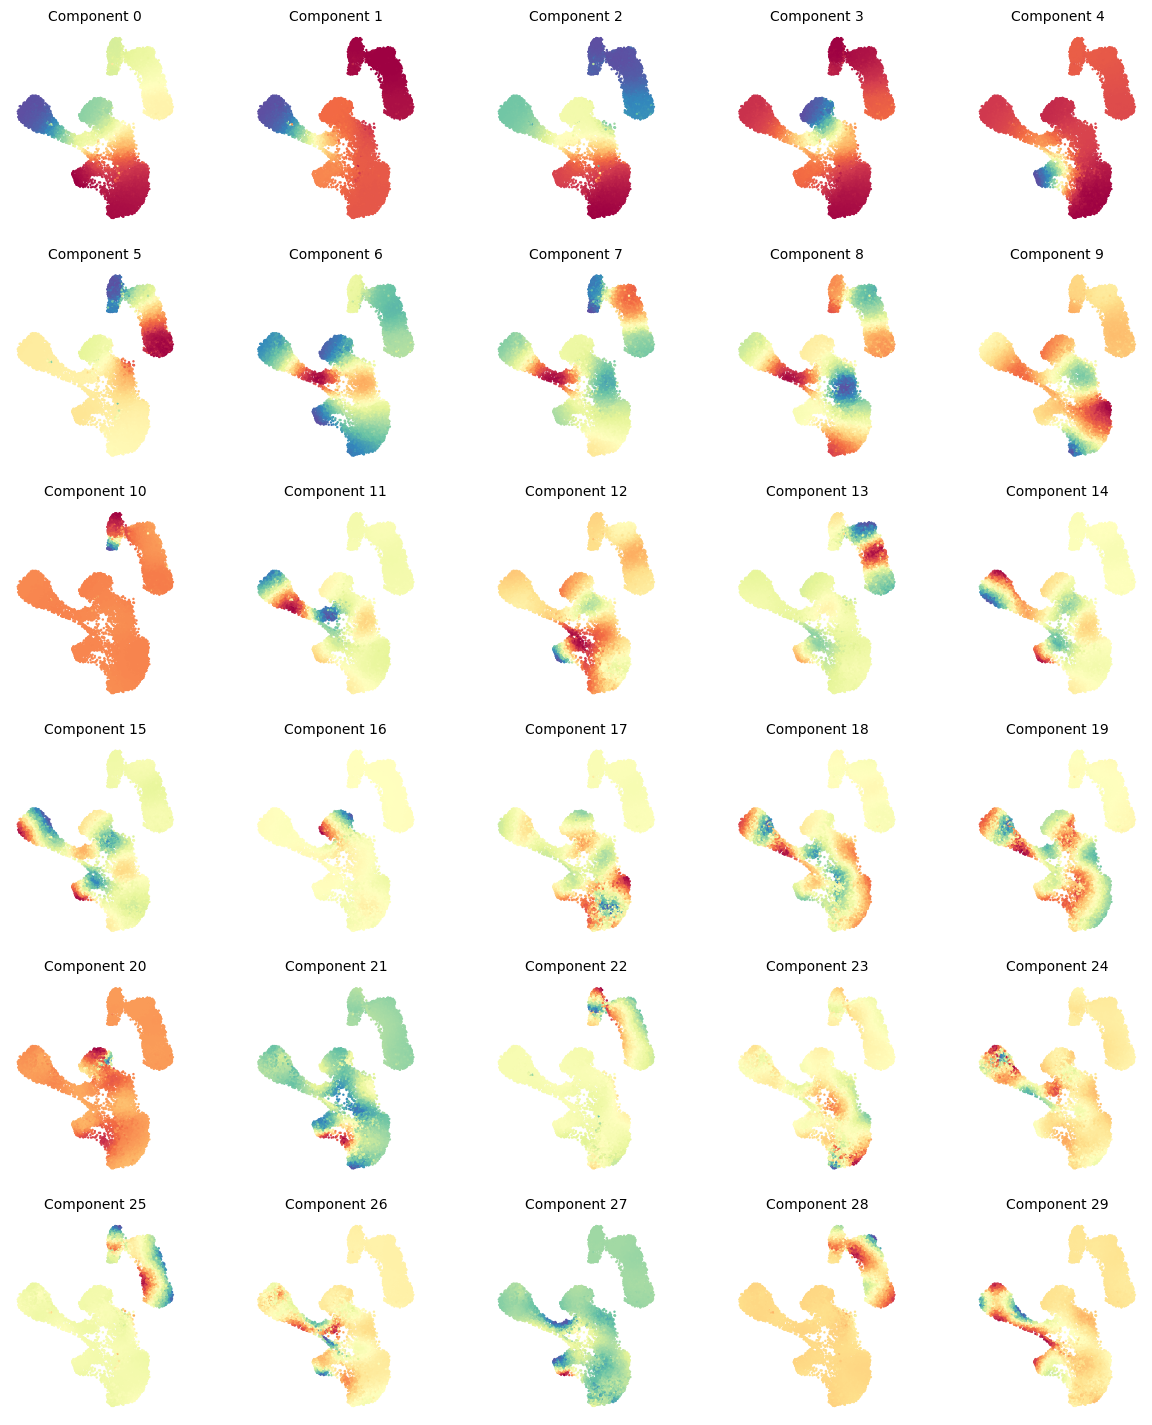

In [344]:
palantir.plot.plot_diffusion_components(cmo)
plt.show()

In [410]:
terminal_states = pd.Series(
    [
        "EMP",
        "MkP",
        "Erythroid",
        "Endothelium",
     #  "Endocardium",
    #    "Mesenchyme",
      #  "Allantois",
       # "Epicardium",
        #"Limb Mesoderm",
    ],
    [
        'TAAGTCGTCCTCTGCA-1_1',  # EMP
       'ATCCGTCCACAGAGCA-1_2',  # MkP
        'ATAGACCGTGCCGGTT-1_1',  # Erythroid
        'TACTTACCATGTAACC-1_2',   # YS Endothelium
    #    'AGAGCAGCAAGGCGTA-1_1',  # Endocardium
      #  'CAATCGACAGTGGTGA-1_1',  # Mesenchyme
       # 'ATCACGATCCACAGCG-1_1',  # Allantois
       # 'AGGTAGGCACCCAACG-1_1',    # Epicardium
        #'CTCCCAAAGCGGACAT-1_1',  # Limb Mesoderm
    ]
)

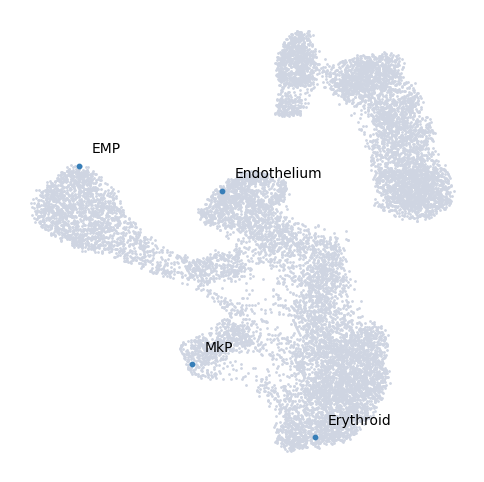

In [411]:
palantir.plot.highlight_cells_on_umap(cmo, terminal_states)
plt.show()

In [412]:
start_cell = "CTAACTTAGGTGCTTT-1_4"
pr_res = palantir.core.run_palantir(
    cmo, start_cell, terminal_states=terminal_states,num_waypoints = 2000
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.059251487255096436 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.3435476660728455 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9998
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


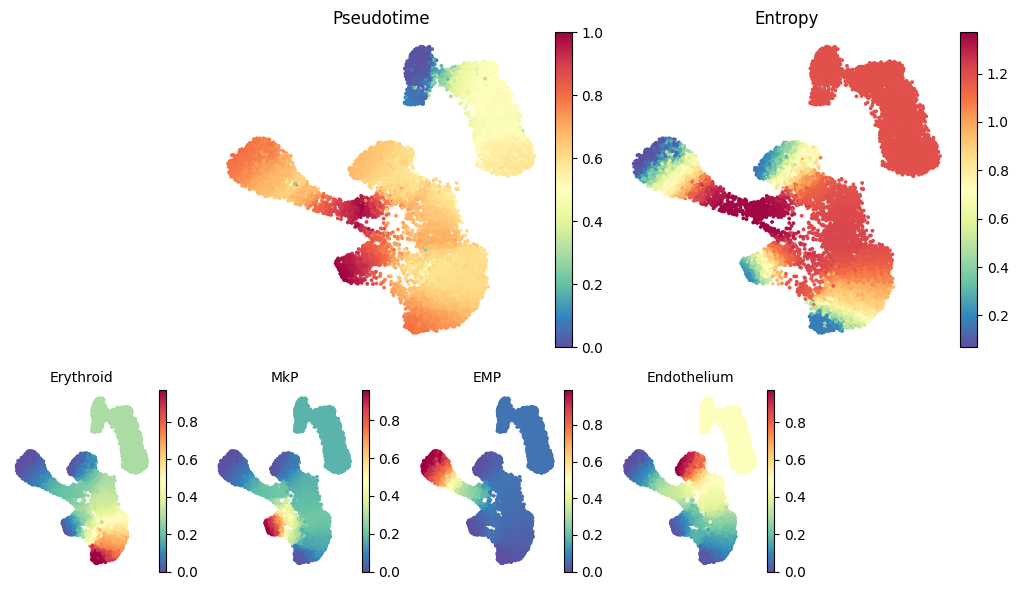

In [413]:
palantir.plot.plot_palantir_results(cmo, s=3)
plt.show()

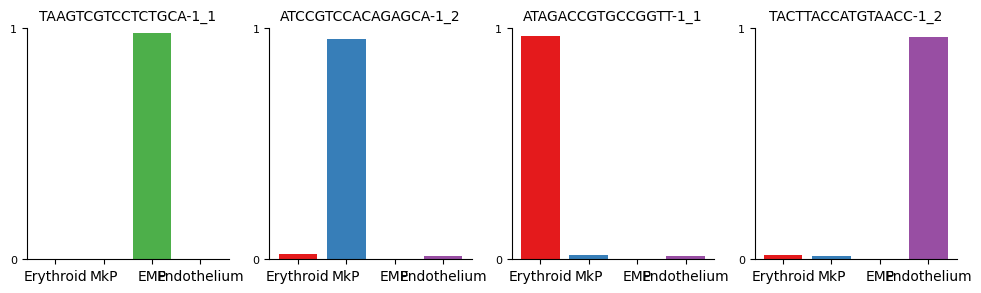

In [414]:
cells =  [
        'TAAGTCGTCCTCTGCA-1_1',  # EMP
       'ATCCGTCCACAGAGCA-1_2',  # MkP
        'ATAGACCGTGCCGGTT-1_1',  # Erythroid
        'TACTTACCATGTAACC-1_2',   # YS Endothelium
        #'AGAGCAGCAAGGCGTA-1_1',  # Endocardium
       # 'CAATCGACAGTGGTGA-1_1',  # Mesenchyme
        #'ATCACGATCCACAGCG-1_1',  # Allantois
        #'AGGTAGGCACCCAACG-1_1',    # Epicardium
        #'CTCCCAAAGCGGACAT-1_1',  # Limb Mesoderm
    ]
palantir.plot.plot_terminal_state_probs(cmo, cells)
plt.show()

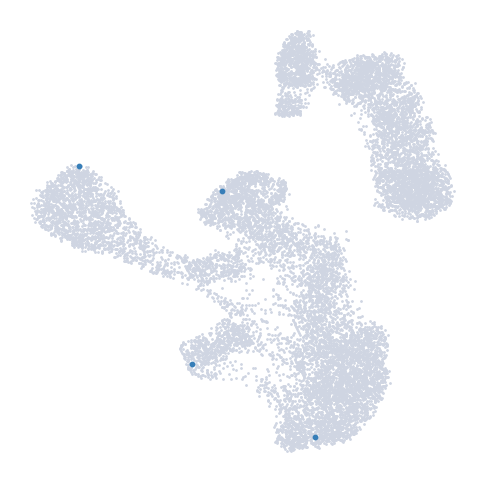

In [415]:
palantir.plot.highlight_cells_on_umap(cmo, cells)
plt.show()

In [416]:
masks = palantir.presults.select_branch_cells(cmo, q=.01, eps=.01)

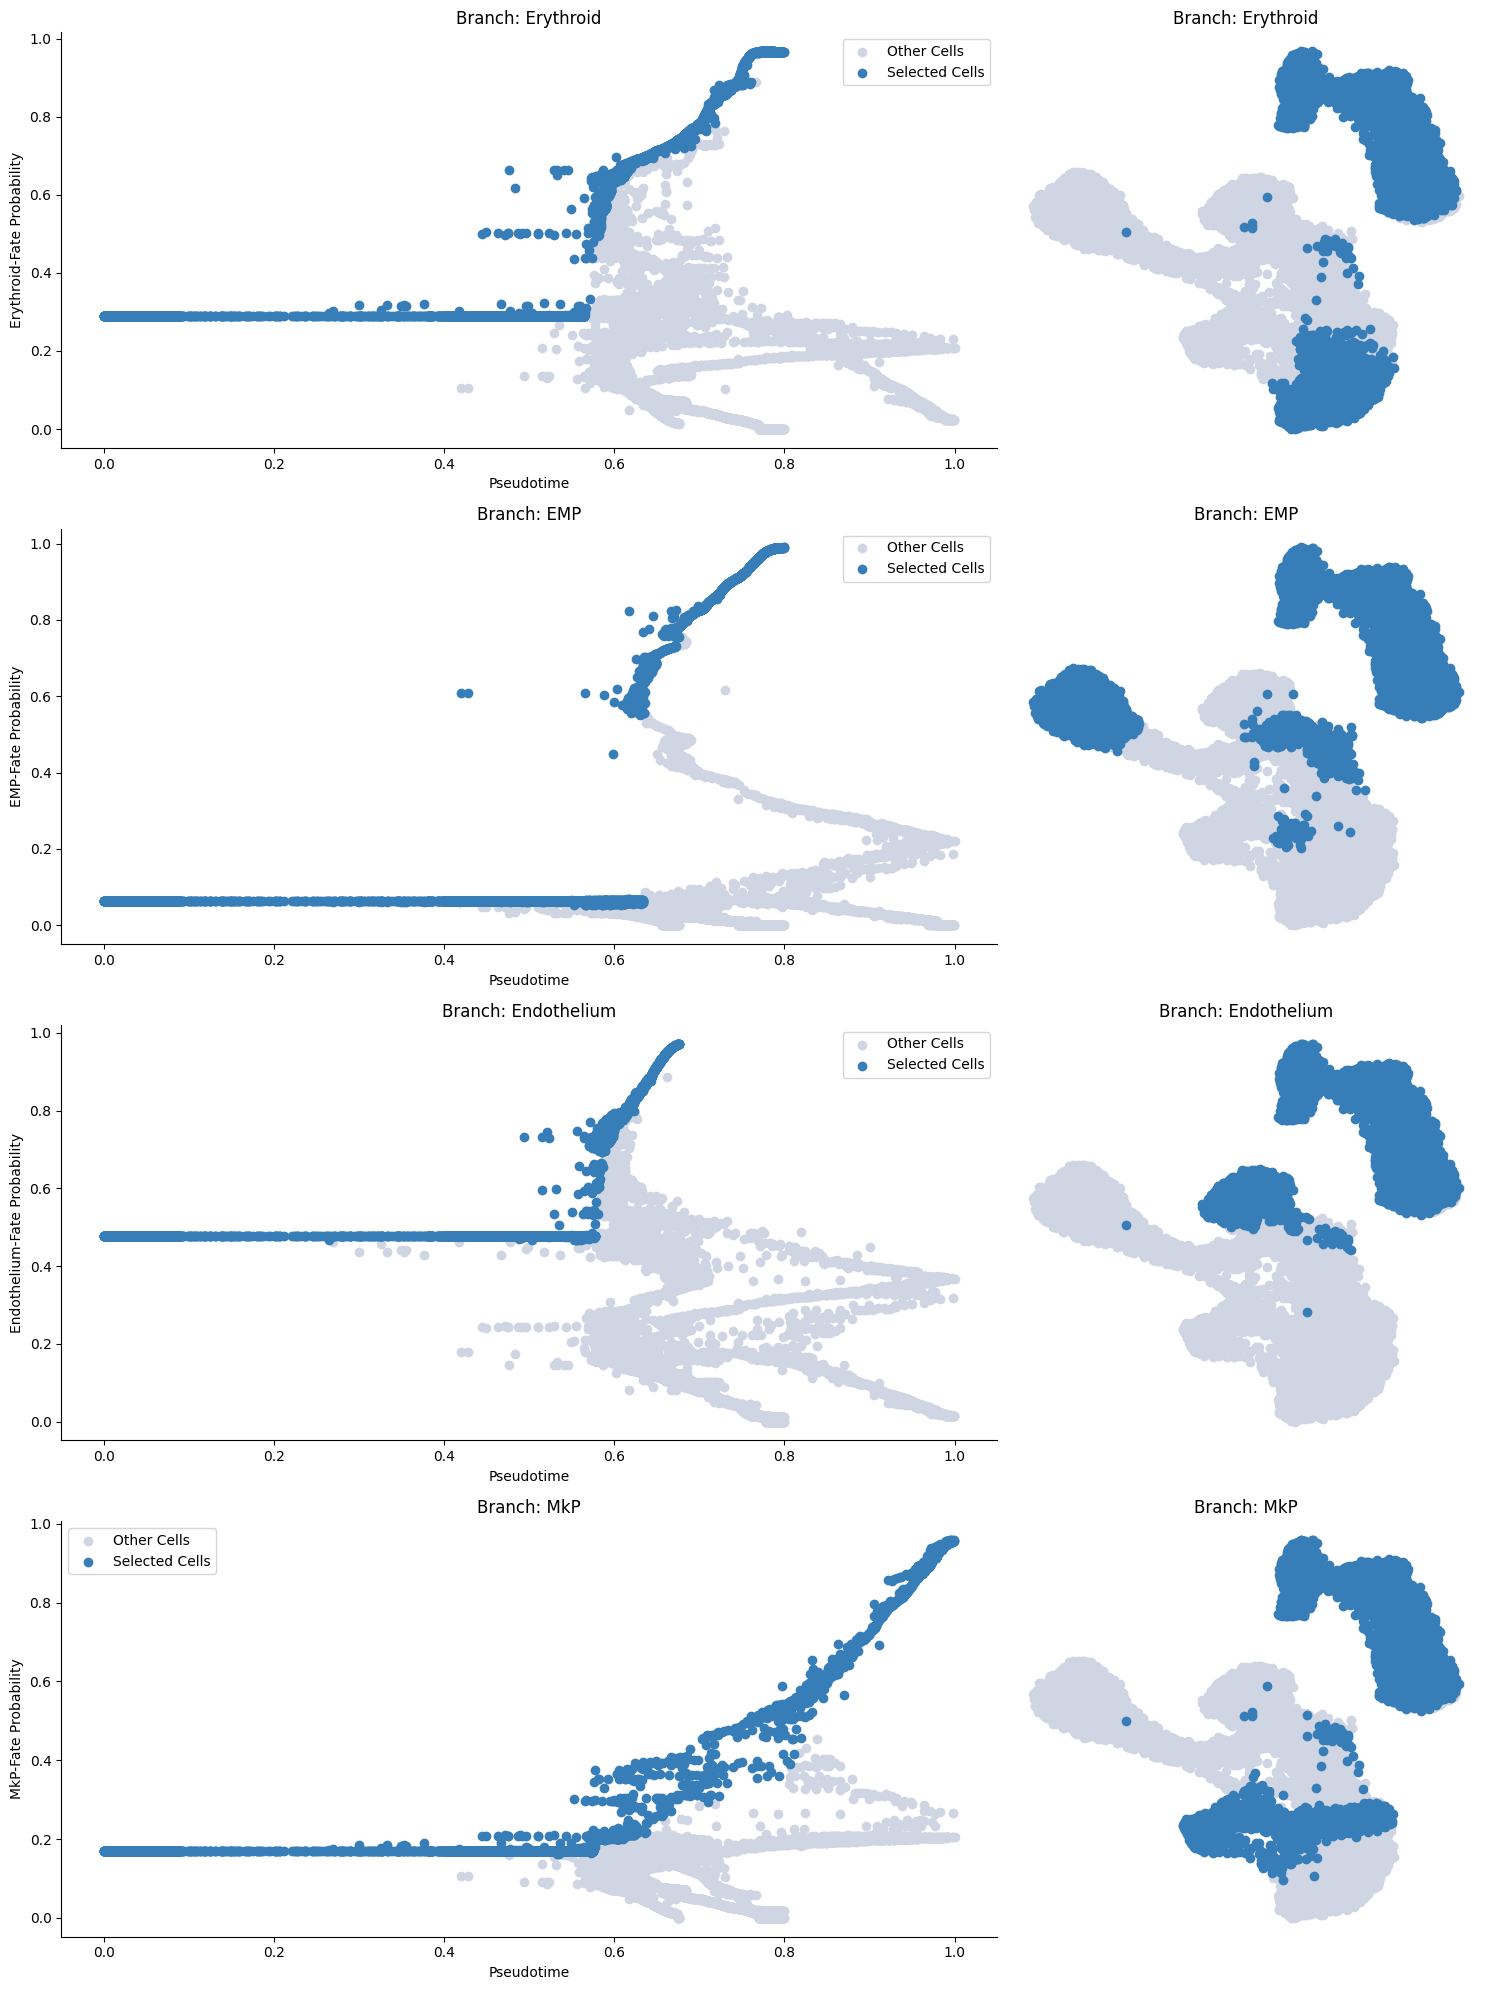

In [417]:
palantir.plot.plot_branch_selection(cmo)
plt.show()

[2025-07-18 12:00:29,808] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (6,436) and rank = 1.0.
[2025-07-18 12:00:29,809] [INFO    ] Using covariance function Matern52(ls=0.46586090326309204).
[2025-07-18 12:00:29,838] [INFO    ] Computing 50 landmarks with k-means clustering (random_state=42).
[2025-07-18 12:00:30,615] [INFO    ] Sigma interpreted as element-wise standard deviation.


<Axes: title={'center': 'Branch: Erythroid'}, xlabel='UMAP1', ylabel='UMAP2'>

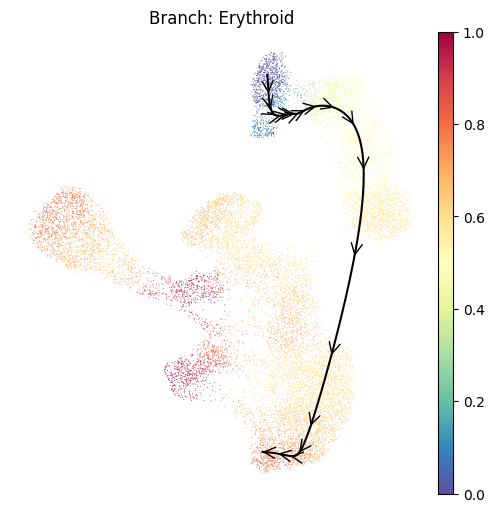

In [418]:
palantir.plot.plot_trajectory(
    cmo,
    "Erythroid",
    figsize=(6, 6),
    n_arrows=20,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

[2025-07-18 12:00:31,869] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (6,064) and rank = 1.0.
[2025-07-18 12:00:31,870] [INFO    ] Using covariance function Matern52(ls=0.46586090326309204).
[2025-07-18 12:00:31,891] [INFO    ] Computing 50 landmarks with k-means clustering (random_state=42).
[2025-07-18 12:00:32,567] [INFO    ] Sigma interpreted as element-wise standard deviation.


<Axes: title={'center': 'Branch: MkP'}, xlabel='UMAP1', ylabel='UMAP2'>

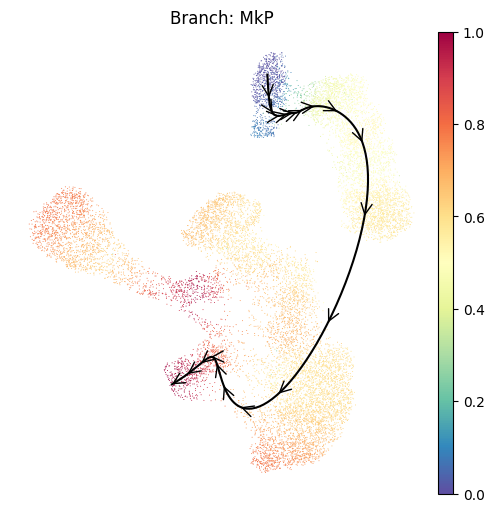

In [419]:
palantir.plot.plot_trajectory(
    cmo,
    "MkP",
    figsize=(6, 6),
    n_arrows=20,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

[2025-07-18 12:00:35,860] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (5,802) and rank = 1.0.
[2025-07-18 12:00:35,861] [INFO    ] Using covariance function Matern52(ls=0.46586090326309204).
[2025-07-18 12:00:35,900] [INFO    ] Computing 50 landmarks with k-means clustering (random_state=42).
[2025-07-18 12:00:36,528] [INFO    ] Sigma interpreted as element-wise standard deviation.


<Axes: title={'center': 'Branch: Endothelium'}, xlabel='UMAP1', ylabel='UMAP2'>

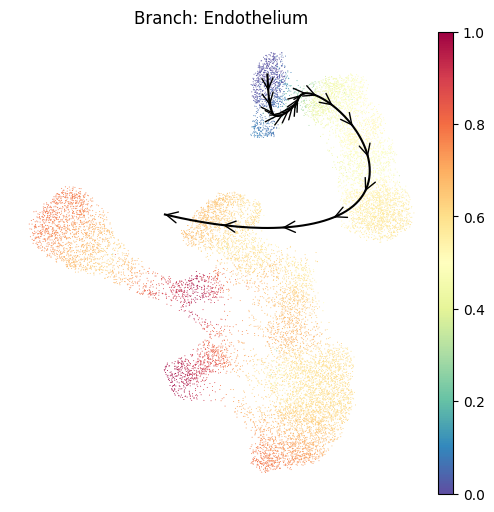

In [420]:
palantir.plot.plot_trajectory(
    cmo,
    "Endothelium",
    figsize=(6, 6),
    n_arrows=20,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

[2025-07-18 12:00:42,141] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (6,909) and rank = 1.0.
[2025-07-18 12:00:42,141] [INFO    ] Using covariance function Matern52(ls=0.46586090326309204).
[2025-07-18 12:00:42,181] [INFO    ] Computing 50 landmarks with k-means clustering (random_state=42).
[2025-07-18 12:00:42,839] [INFO    ] Sigma interpreted as element-wise standard deviation.


<Axes: title={'center': 'Branch: EMP'}, xlabel='UMAP1', ylabel='UMAP2'>

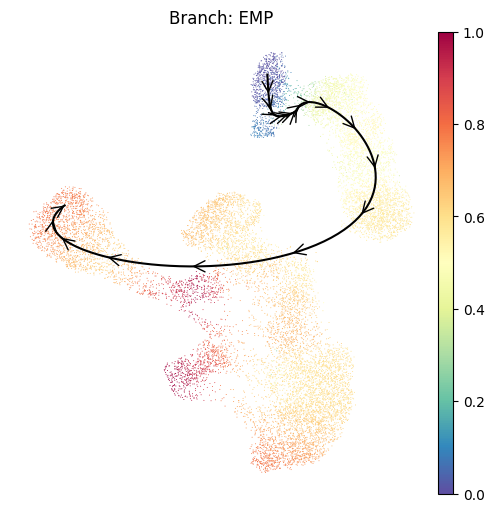

In [421]:
palantir.plot.plot_trajectory(
    cmo,
    "EMP",
    figsize=(6, 6),
    n_arrows=20,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

<Axes: title={'center': 'palantir_pseudotime'}, xlabel='UMAP1', ylabel='UMAP2'>

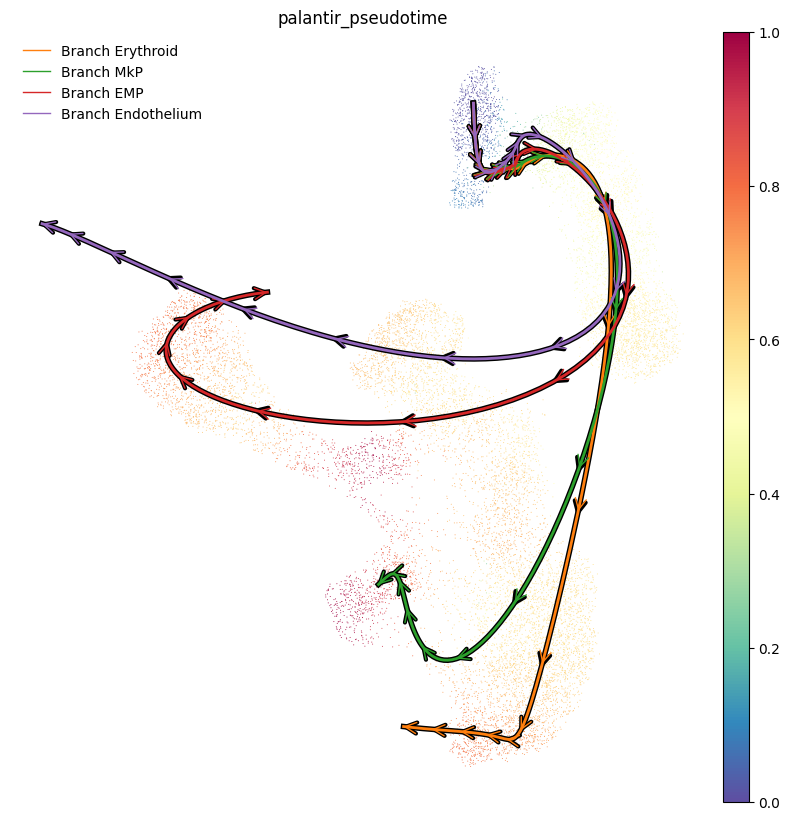

In [422]:
palantir.plot.plot_trajectories(cmo, pseudotime_interval=(0, .9), figsize = (10,10), n_arrows = 20, smoothness = 0.3, scanpy_kwargs={'size': 2})

In [423]:
gene_trends_cmo = palantir.presults.compute_gene_trends(
    cmo,
    expression_key="MAGIC_imputed_data",
)

Erythroid
[2025-07-18 12:00:56,562] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (6,436) and rank = 1.0.
[2025-07-18 12:00:56,563] [INFO    ] Using covariance function Matern52(ls=1.0).
[2025-07-18 12:00:57,148] [INFO    ] Sigma interpreted as element-wise standard deviation.
MkP
[2025-07-18 12:00:58,351] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (6,064) and rank = 1.0.
[2025-07-18 12:00:58,352] [INFO    ] Using covariance function Matern52(ls=1.0).
[2025-07-18 12:00:59,022] [INFO    ] Sigma interpreted as element-wise standard deviation.
EMP
[2025-07-18 12:01:00,275] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (6,909) and rank = 1.0.
[2025-07-18 12:01:00,276] [INFO    ] Using covariance function Matern52(ls=1.0).
[2025-07-18 12:01:00,841] [INFO    ] Sigma interpreted as element-wise standard deviation.
Endothelium
[2025-07-18 12:01:02,107] [INFO    ] Using sparse Gaussian Process since 

In [424]:
cmo

AnnData object with n_obs × n_vars = 14124 × 27998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CMO', 'nFeature_CMO', 'CellRanger_Assignment', 'percent.mt', 'percent.ribo', 'sample_id', 'nFeature_nCount_0_9_ratio', 'scDblFinder_score', 'S.Score', 'G2M.Score', 'Phase', 'scran_sizeFactors', 'Samples', 'Conditions', 'origin', 'Lane', 'ident', 'Phasel', 'lv_groups', 'ch_lv_groups', 'lv_clusters', 'ch_lv_clusters', 'lv_subclusters', 'ch_lv_subclusters', 'cl_1', 'cl_2', 'cl_3', 'Conditions_lv', 'Samples_lv', 'ch_Conditions_lv', 'ch_Samples_lv', 'score_hoxa', 'score_hoxb', 'score_hoxc', 'score_hoxd', 'cl_4', 'cl_4_ch', 'no_cl1', 'no_cl2', 'no_cl3', 'v4k_pca50_predicted.id', 'v4k_pca50_prediction.score.max', 'v4k_pca75_predicted.id', 'v4k_pca75_prediction.score.max', 'v4k_pca100_predicted.id', 'v4k_pca100_prediction.score.max', 'v7k_pca50_predicted.id', 'v7k_pca50_prediction.score.max', 'v7k_pca75_predicted.id', 'v7k_pca75_prediction.score.max', 'v7k_pca100_predicted.id', 'v7k_

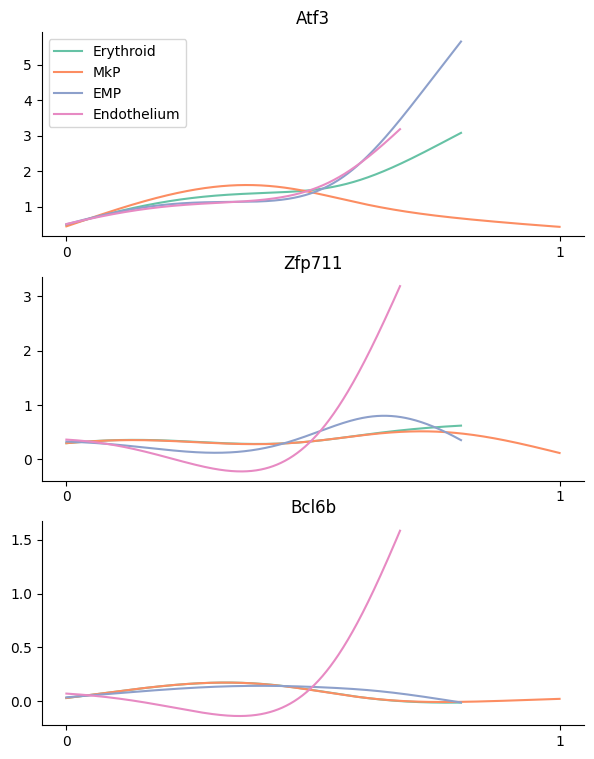

In [425]:
genes = ["Atf3", "Zfp711", "Bcl6b"]
palantir.plot.plot_gene_trends(cmo, genes)
plt.show()

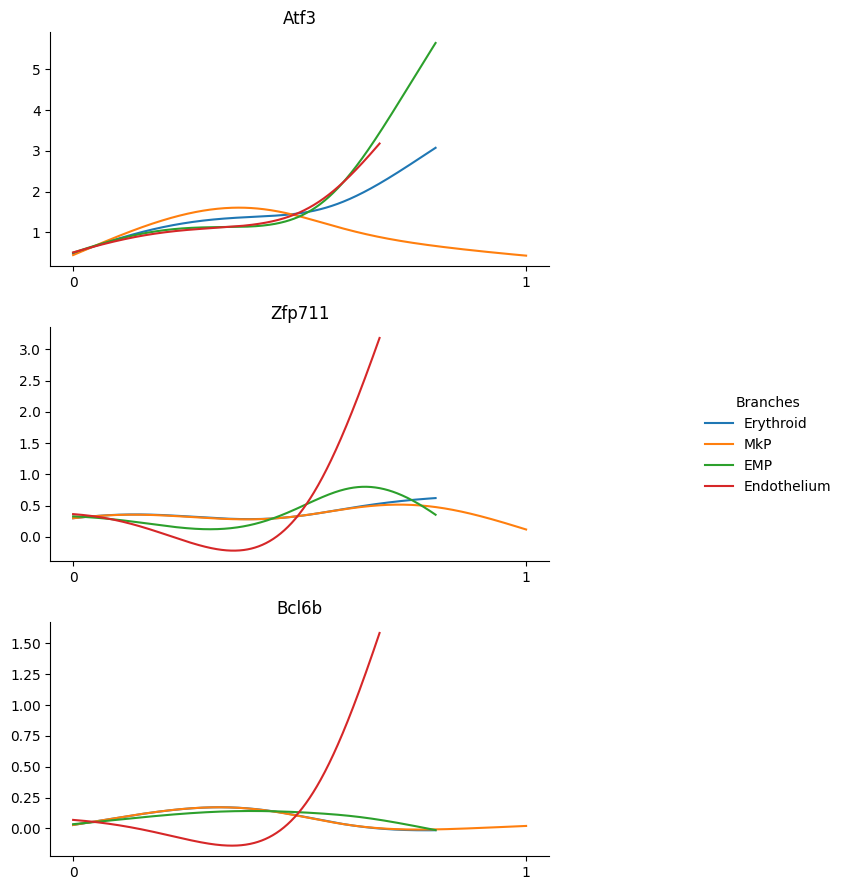

In [428]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_gene_trends

genes = ["Atf3", "Zfp711", "Bcl6b"]

# 1. Draw the multi‐panel gene trends and grab the Figure
fig = plot_gene_trends(cmo, genes)

# 2. Pull out all the Axes
axes = fig.axes

# 3. Get a unified set of handles & labels from the first axes
handles, labels = axes[0].get_legend_handles_labels()

# 4. Build a bigger palette (tab20 has up to 20 distinct colors)
#    Matplotlib ≥3.7 preferred API:
cmap = mpl.colormaps['tab10']
new_colors = [cmap(i) for i in range(len(handles))]

# 5. Recolor each line in every subplot
for ax in axes:
    for line, color in zip(ax.get_lines(), new_colors):
        if line.get_label() in labels:
            line.set_color(color)

# 6. Remove individual legends if present
for ax in axes:
    leg = ax.get_legend()
    if leg is not None:
        ax.get_legend().remove()

# 7. Add one consolidated legend to the right
fig.legend(
    handles, 
    labels, 
    loc='center right', 
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    title='Branches'
)

# 8. Adjust layout to make room for the legend
fig.tight_layout(rect=[0, 0, 0.8, 1])

plt.show()


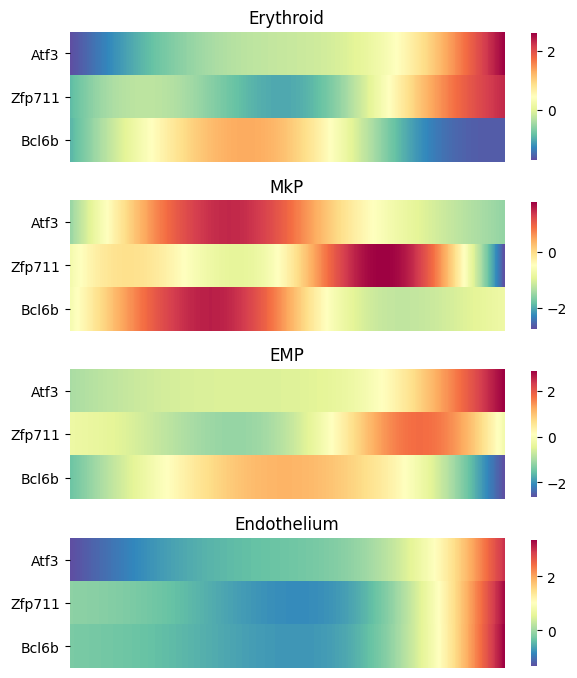

In [429]:
palantir.plot.plot_gene_trend_heatmaps(cmo, genes)
plt.show()

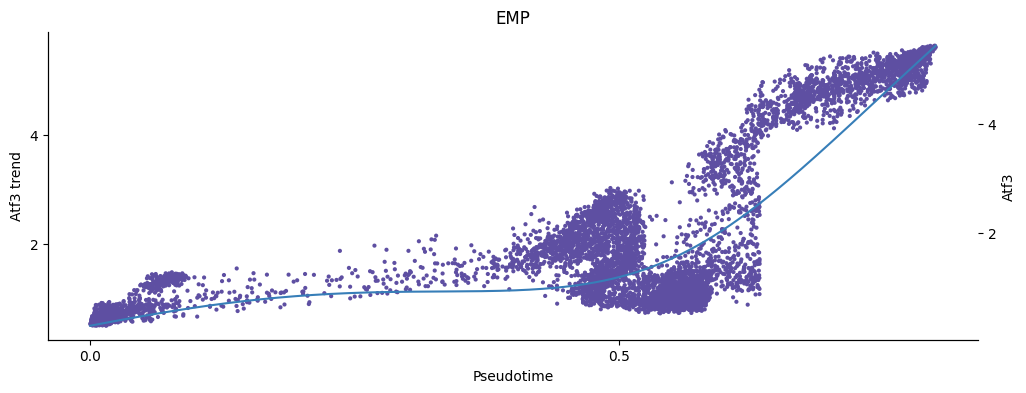

In [430]:
palantir.plot.plot_trend(cmo, branch_name = "EMP", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

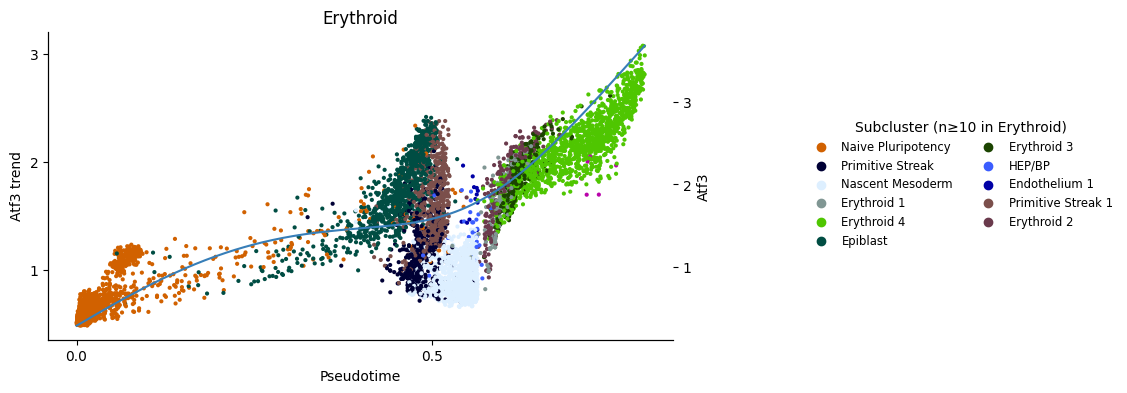

In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'Erythroid'
gene   = 'Atf3'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


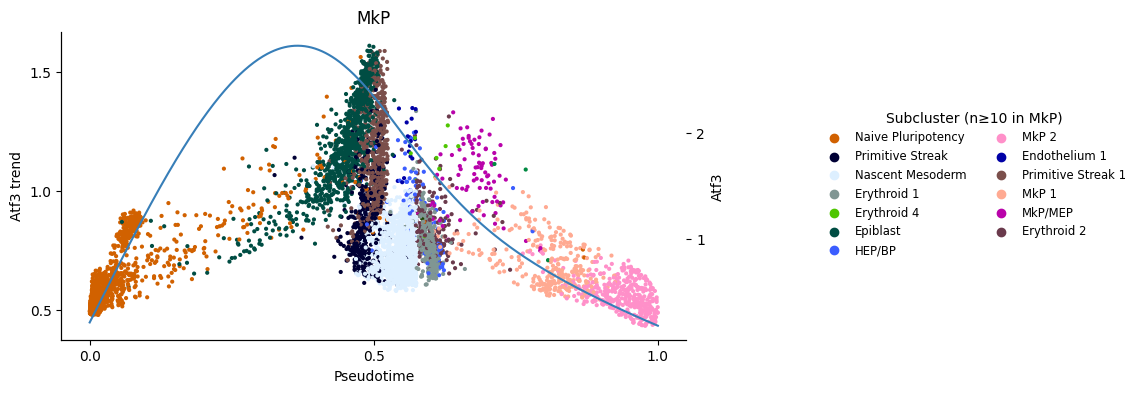

In [432]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'MkP'
gene   = 'Atf3'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


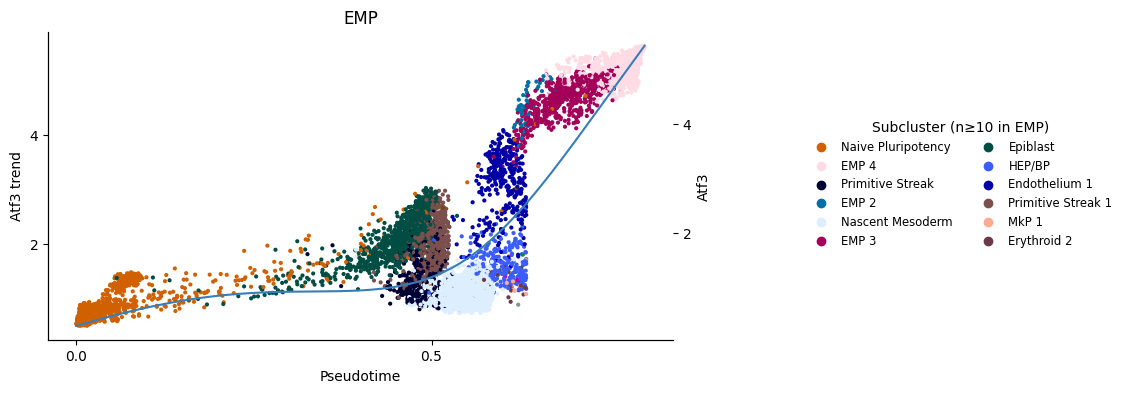

In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'EMP'
gene   = 'Atf3'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


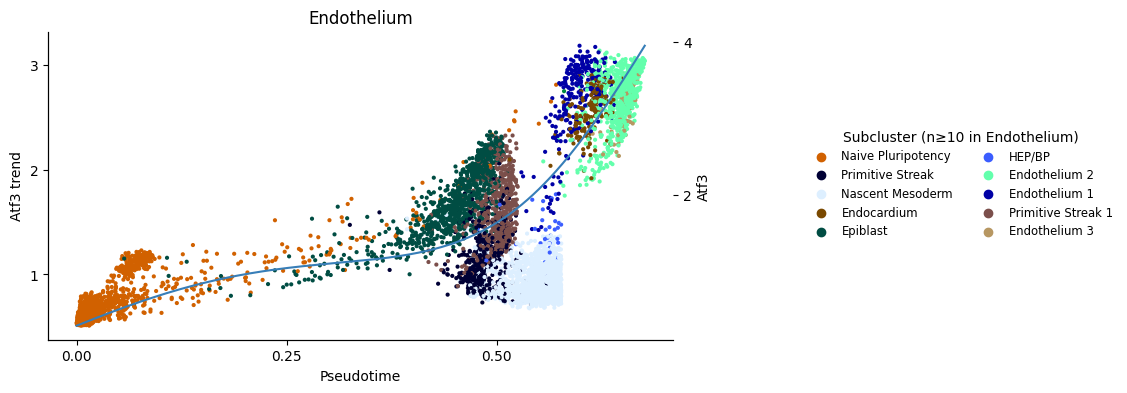

In [434]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'Endothelium'
gene   = 'Atf3'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


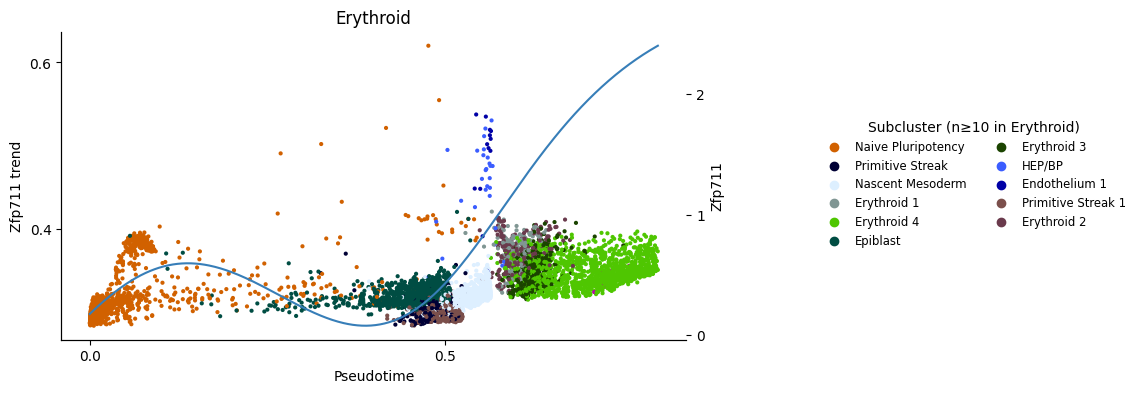

In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'Erythroid'
gene   = 'Zfp711'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


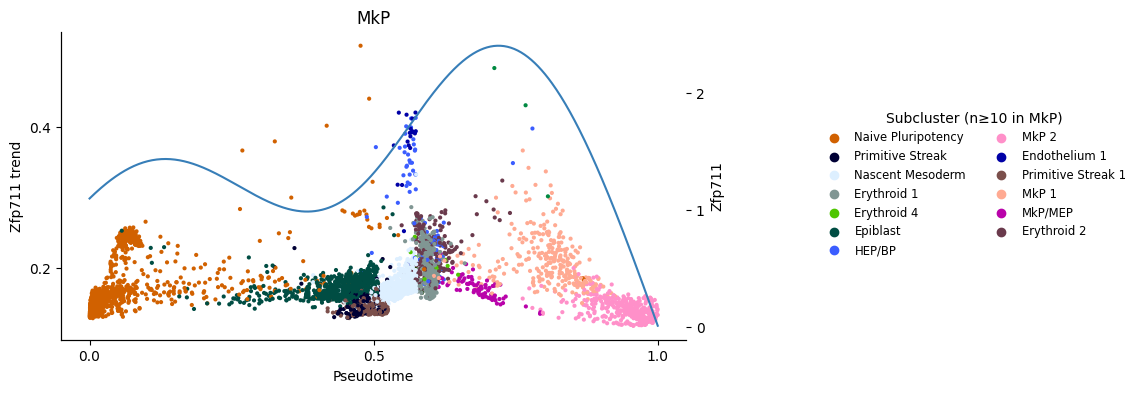

In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'MkP'
gene   = 'Zfp711'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


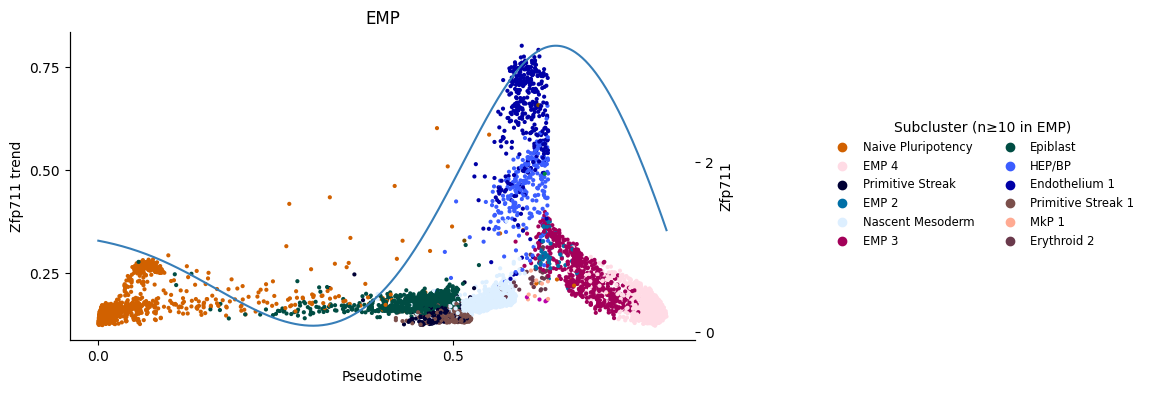

In [437]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'EMP'
gene   = 'Zfp711'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


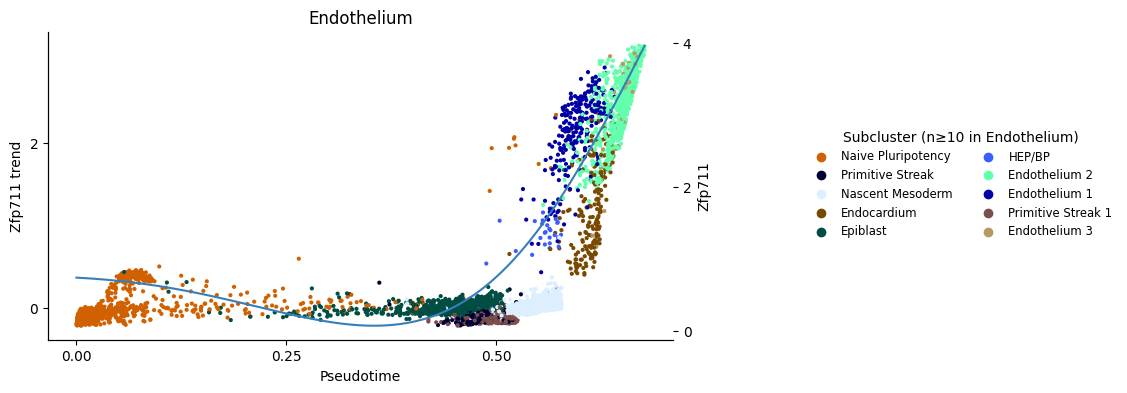

In [438]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'Endothelium'
gene   = 'Zfp711'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


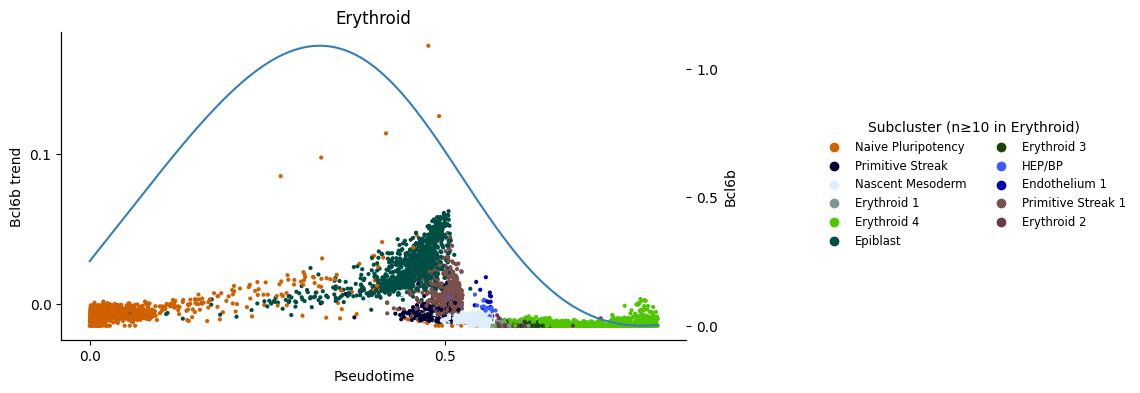

In [439]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'Erythroid'
gene   = 'Bcl6b'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


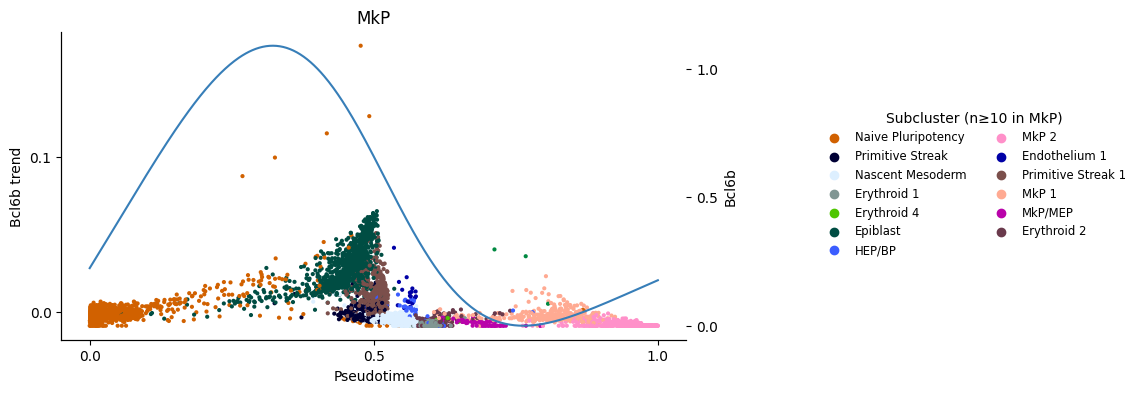

In [440]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'MkP'
gene   = 'Bcl6b'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


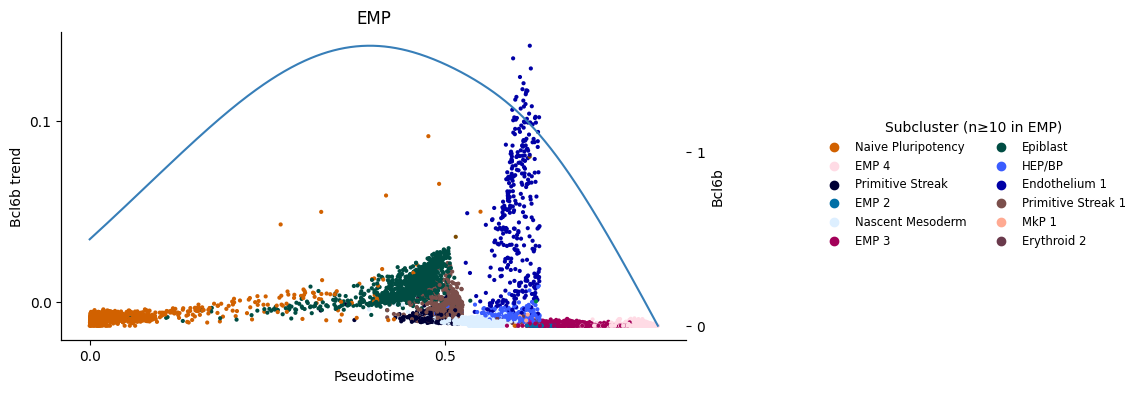

In [441]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'EMP'
gene   = 'Bcl6b'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


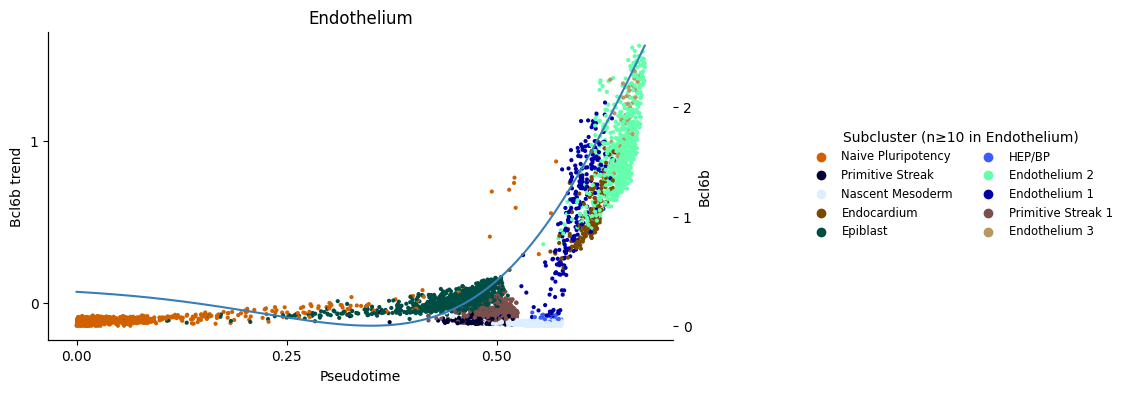

In [442]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'Endothelium'
gene   = 'Bcl6b'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


In [444]:
more_genes = cmo.var_names[:5000]
more_genes

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Rp1.1', 'Sox17', 'Gm37323',
       'Mrpl15', 'Lypla1', 'Gm37988',
       ...
       'Gm15114', 'Gm8334', 'Gm15127', 'Luzp4', 'Gm15099', 'Ott', 'Gm15092',
       'Gm15093', 'Gm15100', 'Gm15085'],
      dtype='object', length=5000)

In [445]:
communities = palantir.presults.cluster_gene_trends(cmo, "Erythroid", more_genes)

/home/ridvan/venv-jlab/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


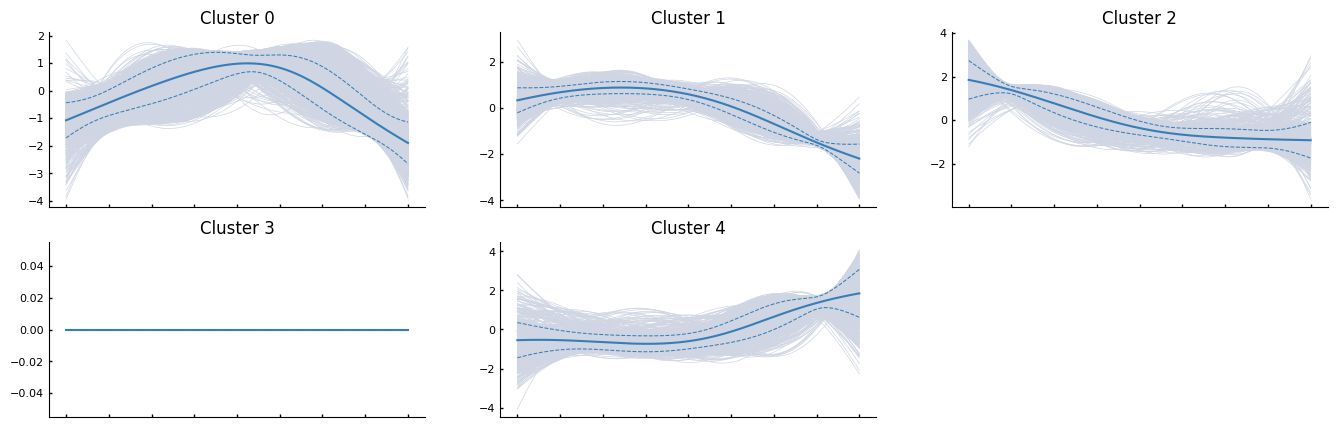

In [446]:
palantir.plot.plot_gene_trend_clusters(cmo, "Erythroid")
plt.show()

In [447]:
cmo

AnnData object with n_obs × n_vars = 14124 × 27998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CMO', 'nFeature_CMO', 'CellRanger_Assignment', 'percent.mt', 'percent.ribo', 'sample_id', 'nFeature_nCount_0_9_ratio', 'scDblFinder_score', 'S.Score', 'G2M.Score', 'Phase', 'scran_sizeFactors', 'Samples', 'Conditions', 'origin', 'Lane', 'ident', 'Phasel', 'lv_groups', 'ch_lv_groups', 'lv_clusters', 'ch_lv_clusters', 'lv_subclusters', 'ch_lv_subclusters', 'cl_1', 'cl_2', 'cl_3', 'Conditions_lv', 'Samples_lv', 'ch_Conditions_lv', 'ch_Samples_lv', 'score_hoxa', 'score_hoxb', 'score_hoxc', 'score_hoxd', 'cl_4', 'cl_4_ch', 'no_cl1', 'no_cl2', 'no_cl3', 'v4k_pca50_predicted.id', 'v4k_pca50_prediction.score.max', 'v4k_pca75_predicted.id', 'v4k_pca75_prediction.score.max', 'v4k_pca100_predicted.id', 'v4k_pca100_prediction.score.max', 'v7k_pca50_predicted.id', 'v7k_pca50_prediction.score.max', 'v7k_pca75_predicted.id', 'v7k_pca75_prediction.score.max', 'v7k_pca100_predicted.id', 'v7k_

/home/ridvan/venv-jlab/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


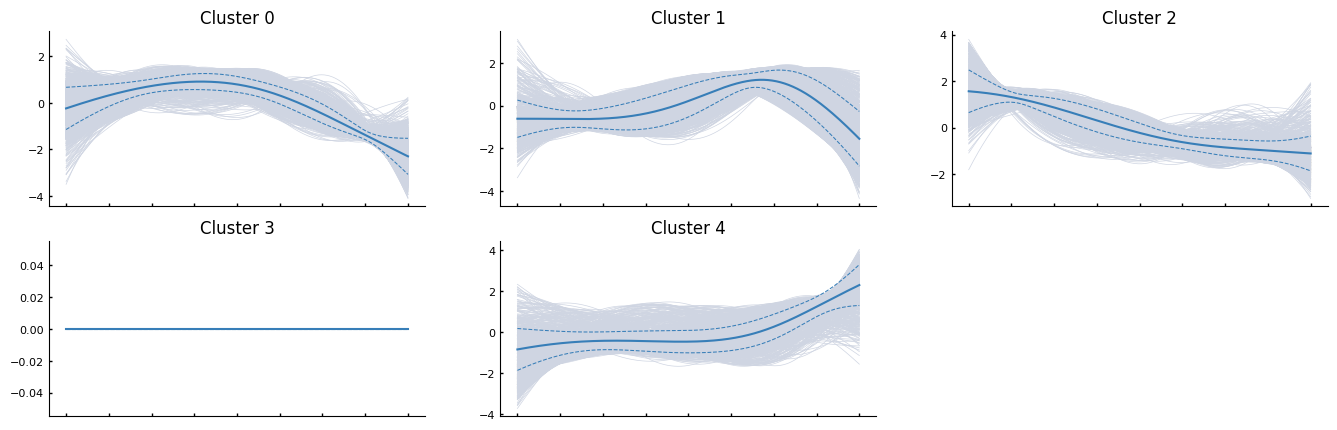

In [448]:
communities = palantir.presults.cluster_gene_trends(cmo, "EMP", more_genes)
palantir.plot.plot_gene_trend_clusters(cmo, "EMP")
plt.show()

/home/ridvan/venv-jlab/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


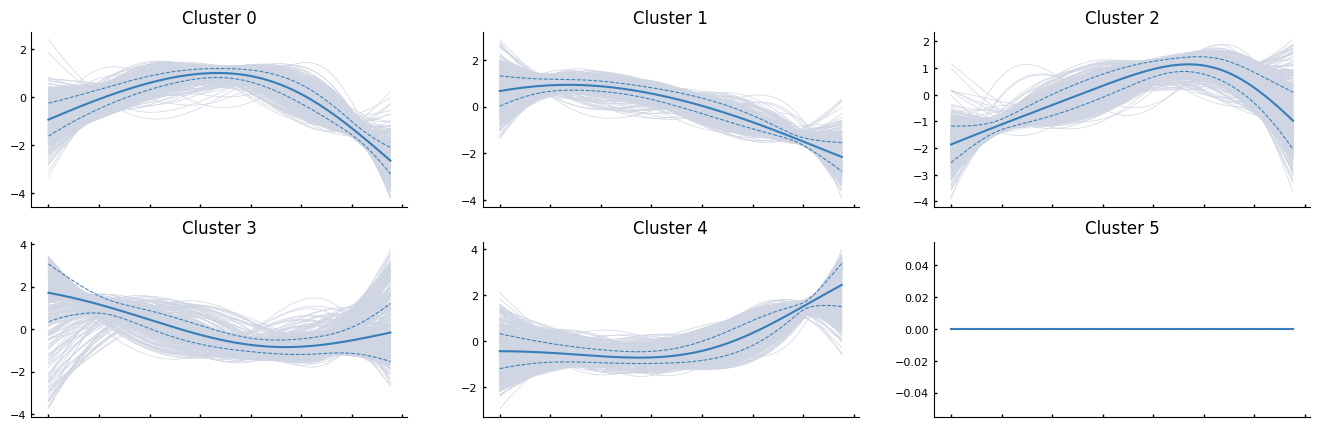

In [451]:
communities = palantir.presults.cluster_gene_trends(cmo, "Endothelium", more_genes)
palantir.plot.plot_gene_trend_clusters(cmo, "Endothelium")
plt.show()

/home/ridvan/venv-jlab/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


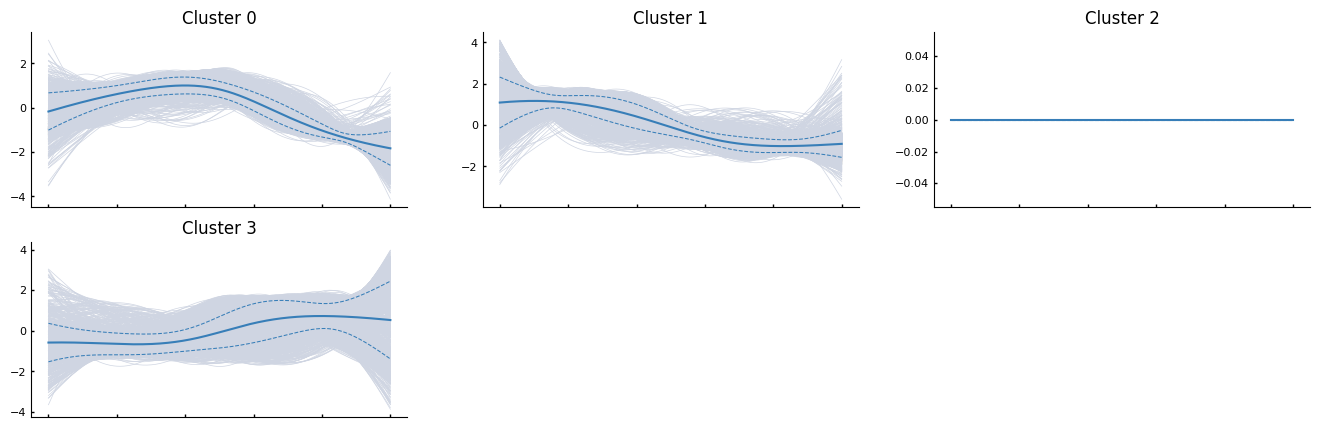

In [452]:
communities = palantir.presults.cluster_gene_trends(cmo, "MkP", more_genes)
palantir.plot.plot_gene_trend_clusters(cmo, "MkP")
plt.show()

In [457]:
# If you have a raw layer, drop the offending column there too
if cmo.raw is not None:
    # Make sure raw.var is a DataFrame, then drop '_index' if present
    raw_var = cmo.raw.var
    if '_index' in raw_var.columns:
        raw_var.drop(columns=['_index'], inplace=True)
        # re‐assign back just in case
        cmo.raw.var = raw_var

# Also drop from var (you already did this, but repeat safely)
if '_index' in cmo.var.columns:
    cmo.var.drop(columns=['_index'], inplace=True)

# Now write without error
cmo.write_h5ad(
    "cmov3_postpalantir_blood_lineages.h5ad",
    compression=None
)


# Mesodermal Lineages

In [4]:
cmo_full

AnnData object with n_obs × n_vars = 71107 × 27998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CMO', 'nFeature_CMO', 'CellRanger_Assignment', 'percent.mt', 'percent.ribo', 'sample_id', 'nFeature_nCount_0_9_ratio', 'scDblFinder_score', 'S.Score', 'G2M.Score', 'Phase', 'scran_sizeFactors', 'Samples', 'Conditions', 'origin', 'Lane', 'ident', 'Phasel', 'lv_groups', 'ch_lv_groups', 'lv_clusters', 'ch_lv_clusters', 'lv_subclusters', 'ch_lv_subclusters', 'cl_1', 'cl_2', 'cl_3', 'Conditions_lv', 'Samples_lv', 'ch_Conditions_lv', 'ch_Samples_lv', 'score_hoxa', 'score_hoxb', 'score_hoxc', 'score_hoxd', 'cl_4', 'cl_4_ch', 'no_cl1', 'no_cl2', 'no_cl3', 'v4k_pca50_predicted.id', 'v4k_pca50_prediction.score.max', 'v4k_pca75_predicted.id', 'v4k_pca75_prediction.score.max', 'v4k_pca100_predicted.id', 'v4k_pca100_prediction.score.max', 'v7k_pca50_predicted.id', 'v7k_pca50_prediction.score.max', 'v7k_pca75_predicted.id', 'v7k_pca75_prediction.score.max', 'v7k_pca100_predicted.id', 'v7k_

In [5]:
# List all unique cell types in 'cell_type_clusters_ch'
print(cmo_full.obs['ch_lv_groups'].unique())


['EarlyDiff' 'Late_Mesoderm' 'Hematopoietic']


In [6]:
cmo_full

AnnData object with n_obs × n_vars = 71107 × 27998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CMO', 'nFeature_CMO', 'CellRanger_Assignment', 'percent.mt', 'percent.ribo', 'sample_id', 'nFeature_nCount_0_9_ratio', 'scDblFinder_score', 'S.Score', 'G2M.Score', 'Phase', 'scran_sizeFactors', 'Samples', 'Conditions', 'origin', 'Lane', 'ident', 'Phasel', 'lv_groups', 'ch_lv_groups', 'lv_clusters', 'ch_lv_clusters', 'lv_subclusters', 'ch_lv_subclusters', 'cl_1', 'cl_2', 'cl_3', 'Conditions_lv', 'Samples_lv', 'ch_Conditions_lv', 'ch_Samples_lv', 'score_hoxa', 'score_hoxb', 'score_hoxc', 'score_hoxd', 'cl_4', 'cl_4_ch', 'no_cl1', 'no_cl2', 'no_cl3', 'v4k_pca50_predicted.id', 'v4k_pca50_prediction.score.max', 'v4k_pca75_predicted.id', 'v4k_pca75_prediction.score.max', 'v4k_pca100_predicted.id', 'v4k_pca100_prediction.score.max', 'v7k_pca50_predicted.id', 'v7k_pca50_prediction.score.max', 'v7k_pca75_predicted.id', 'v7k_pca75_prediction.score.max', 'v7k_pca100_predicted.id', 'v7k_

In [7]:
remove_types = [
'Hematopoietic'
]

# Create a filtered AnnData object excluding these types
cmo = cmo_full[~cmo_full.obs['ch_lv_groups'].isin(remove_types)].copy()


In [8]:
cmo

AnnData object with n_obs × n_vars = 61737 × 27998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CMO', 'nFeature_CMO', 'CellRanger_Assignment', 'percent.mt', 'percent.ribo', 'sample_id', 'nFeature_nCount_0_9_ratio', 'scDblFinder_score', 'S.Score', 'G2M.Score', 'Phase', 'scran_sizeFactors', 'Samples', 'Conditions', 'origin', 'Lane', 'ident', 'Phasel', 'lv_groups', 'ch_lv_groups', 'lv_clusters', 'ch_lv_clusters', 'lv_subclusters', 'ch_lv_subclusters', 'cl_1', 'cl_2', 'cl_3', 'Conditions_lv', 'Samples_lv', 'ch_Conditions_lv', 'ch_Samples_lv', 'score_hoxa', 'score_hoxb', 'score_hoxc', 'score_hoxd', 'cl_4', 'cl_4_ch', 'no_cl1', 'no_cl2', 'no_cl3', 'v4k_pca50_predicted.id', 'v4k_pca50_prediction.score.max', 'v4k_pca75_predicted.id', 'v4k_pca75_prediction.score.max', 'v4k_pca100_predicted.id', 'v4k_pca100_prediction.score.max', 'v7k_pca50_predicted.id', 'v7k_pca50_prediction.score.max', 'v7k_pca75_predicted.id', 'v7k_pca75_prediction.score.max', 'v7k_pca100_predicted.id', 'v7k_

In [9]:
remove_types = [
    'Visceral Endoderm',
    'Amniotic Ectoderm 3',
    'PGC',
    'Amniotic Ectoderm 2',
    'Amniotic Ectoderm 1',
    'Anterior Primitive Streak'
]

# Create a filtered AnnData object excluding these types
cmo = cmo[~cmo.obs['cell_type_clusters_ch'].isin(remove_types)].copy()


In [10]:
cmo

AnnData object with n_obs × n_vars = 59804 × 27998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CMO', 'nFeature_CMO', 'CellRanger_Assignment', 'percent.mt', 'percent.ribo', 'sample_id', 'nFeature_nCount_0_9_ratio', 'scDblFinder_score', 'S.Score', 'G2M.Score', 'Phase', 'scran_sizeFactors', 'Samples', 'Conditions', 'origin', 'Lane', 'ident', 'Phasel', 'lv_groups', 'ch_lv_groups', 'lv_clusters', 'ch_lv_clusters', 'lv_subclusters', 'ch_lv_subclusters', 'cl_1', 'cl_2', 'cl_3', 'Conditions_lv', 'Samples_lv', 'ch_Conditions_lv', 'ch_Samples_lv', 'score_hoxa', 'score_hoxb', 'score_hoxc', 'score_hoxd', 'cl_4', 'cl_4_ch', 'no_cl1', 'no_cl2', 'no_cl3', 'v4k_pca50_predicted.id', 'v4k_pca50_prediction.score.max', 'v4k_pca75_predicted.id', 'v4k_pca75_prediction.score.max', 'v4k_pca100_predicted.id', 'v4k_pca100_prediction.score.max', 'v7k_pca50_predicted.id', 'v7k_pca50_prediction.score.max', 'v7k_pca75_predicted.id', 'v7k_pca75_prediction.score.max', 'v7k_pca100_predicted.id', 'v7k_

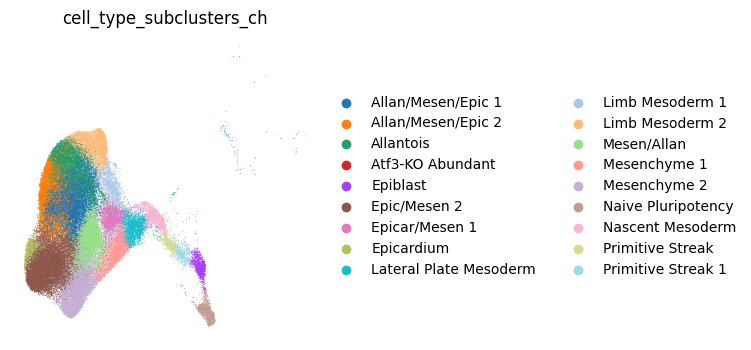

In [12]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    cmo,
    basis="X_UMAP",
        color='cell_type_subclusters_ch',
    frameon=False,
)

In [11]:
#sc.pp.normalize_per_cell(cmo)

/tmp/ipykernel_51914/3003711068.py:1: FutureWarning: Use sc.pp.normalize_total instead
  sc.pp.normalize_per_cell(cmo)
/home/ridvan/venv-jlab/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:591: FutureWarning: Use sc.pp.normalize_total instead
  normalize_per_cell(


In [12]:
#palantir.preprocess.log_transform(cmo)

In [13]:
#sc.pp.highly_variable_genes(cmo, n_top_genes=4000)

In [14]:
#sc.pp.pca(cmo)

In [13]:
cmo

AnnData object with n_obs × n_vars = 59804 × 27998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CMO', 'nFeature_CMO', 'CellRanger_Assignment', 'percent.mt', 'percent.ribo', 'sample_id', 'nFeature_nCount_0_9_ratio', 'scDblFinder_score', 'S.Score', 'G2M.Score', 'Phase', 'scran_sizeFactors', 'Samples', 'Conditions', 'origin', 'Lane', 'ident', 'Phasel', 'lv_groups', 'ch_lv_groups', 'lv_clusters', 'ch_lv_clusters', 'lv_subclusters', 'ch_lv_subclusters', 'cl_1', 'cl_2', 'cl_3', 'Conditions_lv', 'Samples_lv', 'ch_Conditions_lv', 'ch_Samples_lv', 'score_hoxa', 'score_hoxb', 'score_hoxc', 'score_hoxd', 'cl_4', 'cl_4_ch', 'no_cl1', 'no_cl2', 'no_cl3', 'v4k_pca50_predicted.id', 'v4k_pca50_prediction.score.max', 'v4k_pca75_predicted.id', 'v4k_pca75_prediction.score.max', 'v4k_pca100_predicted.id', 'v4k_pca100_prediction.score.max', 'v7k_pca50_predicted.id', 'v7k_pca50_prediction.score.max', 'v7k_pca75_predicted.id', 'v7k_pca75_prediction.score.max', 'v7k_pca100_predicted.id', 'v7k_

In [15]:
cmo.obsm['X_pca'] = cmo.obsm['X_PCA']

In [16]:
# Run diffusion maps
dm_res = palantir.utils.run_diffusion_maps(cmo, n_components=30)

/home/ridvan/venv-jlab/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
ms_data = palantir.utils.determine_multiscale_space(cmo)

In [18]:
#sc.pp.neighbors(cmo)
#sc.tl.umap(cmo)

In [17]:
cmo.obsm['X_umap'] = cmo.obsm['X_UMAP']

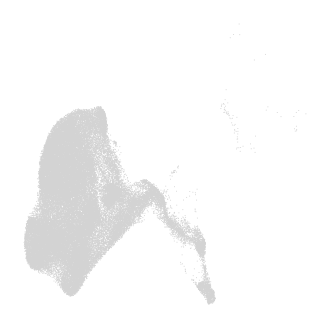

In [18]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    cmo,
    basis="umap",
    frameon=False,
)

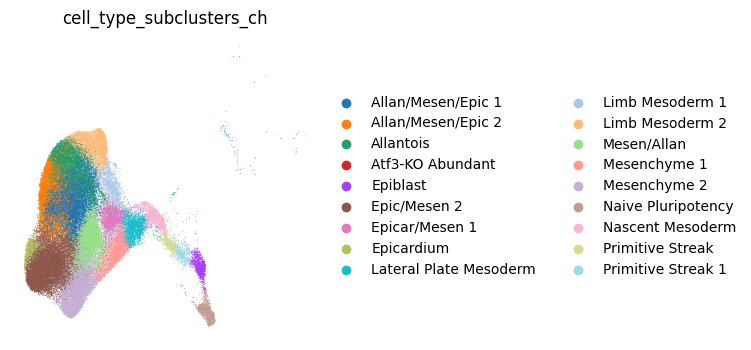

In [19]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    cmo,
    basis="umap",
        color='cell_type_subclusters_ch',
    frameon=False,
)

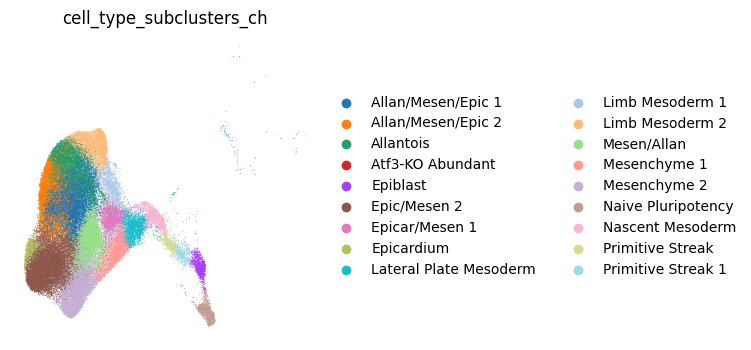

In [20]:
# Use scanpy functions to visualize umaps or FDL
sc.pl.embedding(
    cmo,
    basis="X_UMAP",
        color='cell_type_subclusters_ch',
    frameon=False,
)

In [21]:
imputed_X = palantir.utils.run_magic_imputation(cmo,n_jobs=20)

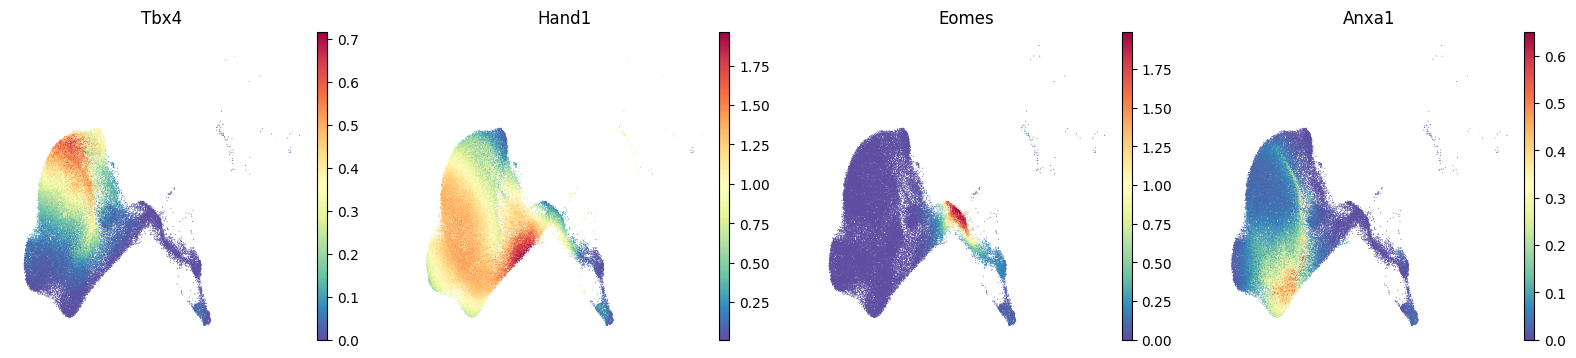

In [22]:
sc.pl.embedding(
    cmo,
    basis="umap",
    layer="MAGIC_imputed_data",
    color=["Tbx4", "Hand1", "Eomes", "Anxa1"],
    frameon=False,
)
plt.show()

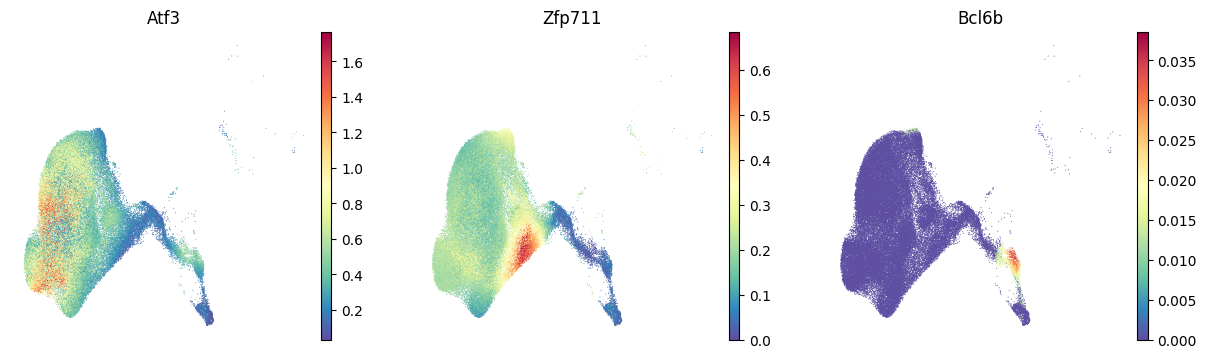

In [23]:
sc.pl.embedding(
    cmo,
    basis="umap",
    layer="MAGIC_imputed_data",
    color=["Atf3", "Zfp711", "Bcl6b"],
    frameon=False,
)
plt.show()

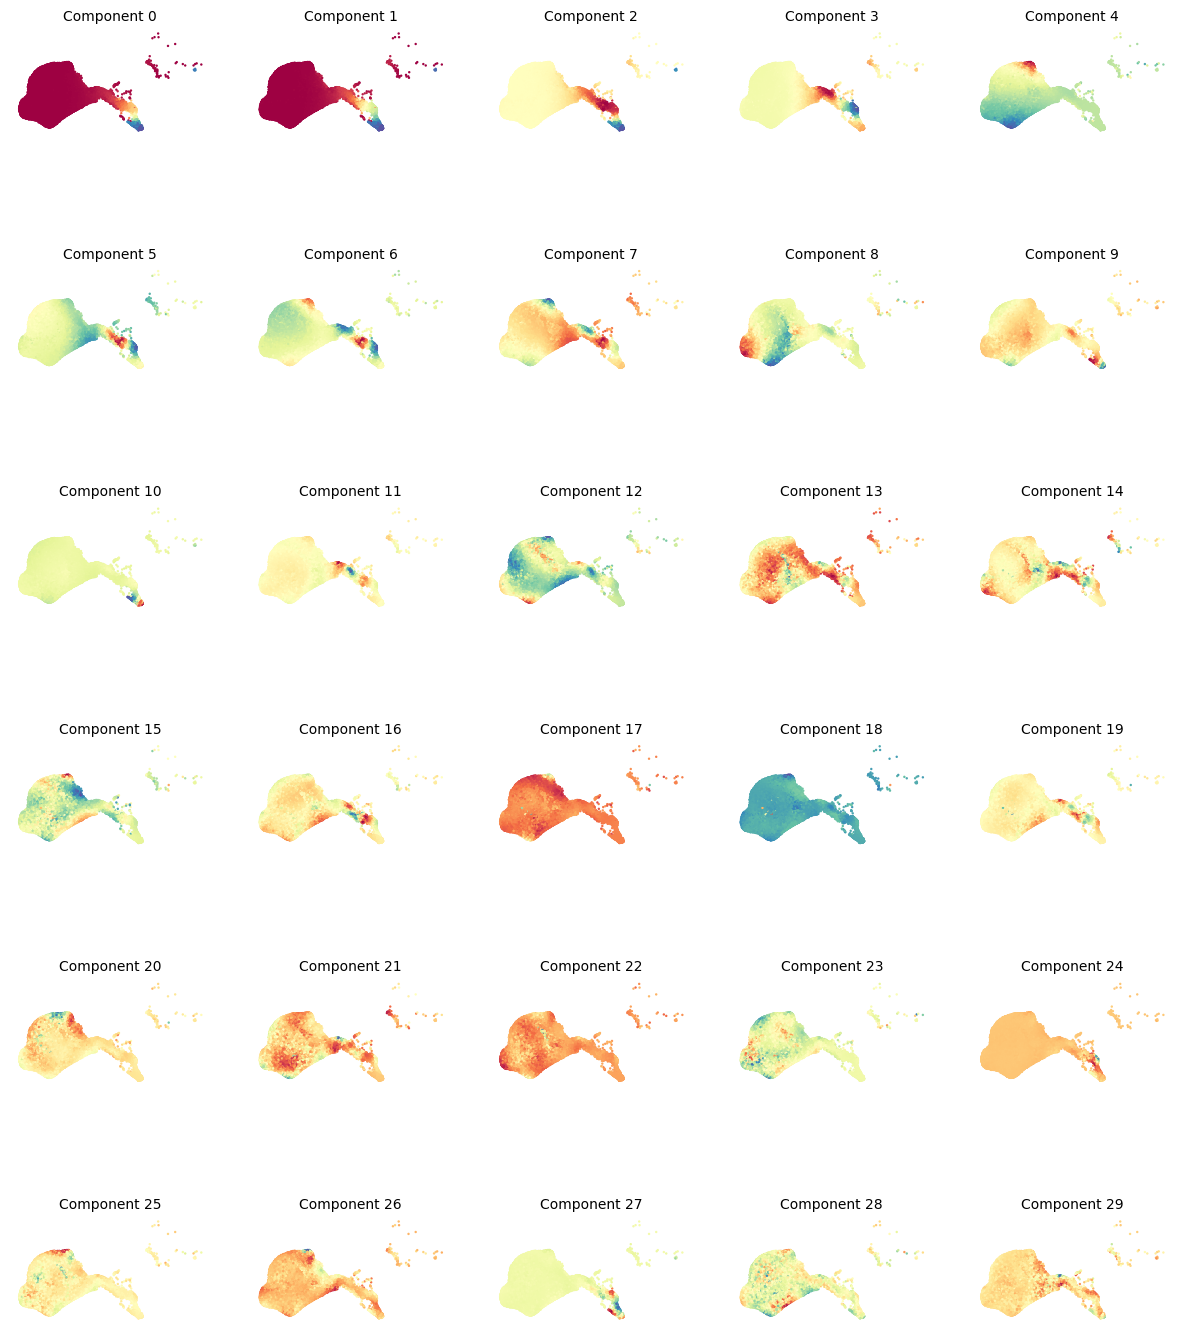

In [24]:
palantir.plot.plot_diffusion_components(cmo)
plt.show()

In [25]:
terminal_states = pd.Series(
    [
    #    "EMP",
     #   "MkP",
     #   "Erythroid",
     #   "Endothelium",
     #  "Endocardium",
       "Mesenchyme",
        "Allantois",
        "Epicardium",
        "Limb Mesoderm",
    ],
    [
      #  'TAAGTCGTCCTCTGCA-1_1',  # EMP
      # 'ATCCGTCCACAGAGCA-1_2',  # MkP
      #  'ATAGACCGTGCCGGTT-1_1',  # Erythroid
      #  'TACTTACCATGTAACC-1_2',   # YS Endothelium
       # 'AGAGCAGCAAGGCGTA-1_1',  # Endocardium
        'CAATCGACAGTGGTGA-1_1',  # Mesenchyme
        'ATCACGATCCACAGCG-1_1',  # Allantois
        'AGGTAGGCACCCAACG-1_1',    # Epicardium
        'CTCCCAAAGCGGACAT-1_1',  # Limb Mesoderm
    ]
)

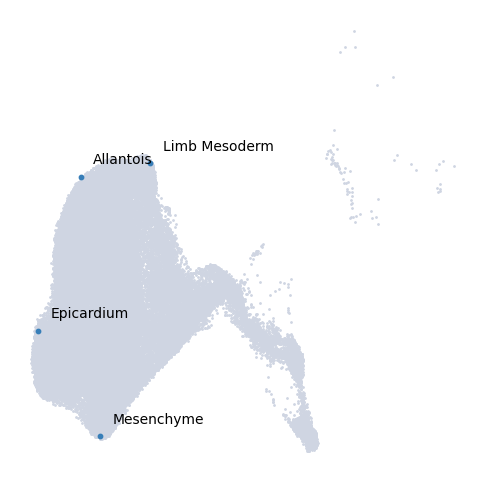

In [26]:
palantir.plot.highlight_cells_on_umap(cmo, terminal_states)
plt.show()

In [ ]:
#term_states = palantir.utils.find_terminal_states(cmo,celltypes =  cmo.obs['cell_type_subclusters_ch'].unique(),celltype_column = 'cell_type_subclusters_ch')
term_states

In [ ]:
#term_states

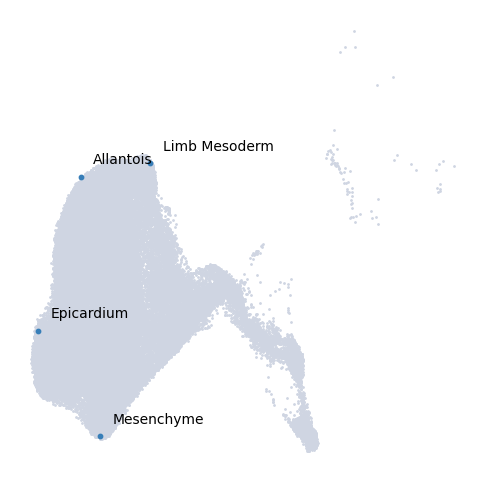

In [27]:
palantir.plot.highlight_cells_on_umap(cmo, terminal_states)
plt.show()

In [ ]:
print(cmo.obs['cell_type_subclusters_ch'].unique())

In [ ]:
# 1) Drop any entries whose value is one of the unwanted cell‐types
#to_remove = ['Naive Pluripotency', 'Epiblast', 'Nascent Mesoderm']
#term_states = term_states[~term_states.isin(to_remove)]

# 2) Add the Allantois entry
##term_states.loc['ATCACGATCCACAGCG-1_1'] = 'Allantois'

# 3) (Optional) If you want to keep it sorted by label or by index:
#    sort by index:
# term_states = term_states.sort_index()
#    or sort by label:
# term_states = term_states.sort_values()

print(term_states)


In [ ]:
#palantir.plot.highlight_cells_on_umap(cmo, term_states)
#plt.show()

In [35]:
ms_data = palantir.utils.determine_multiscale_space(cmo)

In [36]:
cmo

AnnData object with n_obs × n_vars = 59804 × 27998
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CMO', 'nFeature_CMO', 'CellRanger_Assignment', 'percent.mt', 'percent.ribo', 'sample_id', 'nFeature_nCount_0_9_ratio', 'scDblFinder_score', 'S.Score', 'G2M.Score', 'Phase', 'scran_sizeFactors', 'Samples', 'Conditions', 'origin', 'Lane', 'ident', 'Phasel', 'lv_groups', 'ch_lv_groups', 'lv_clusters', 'ch_lv_clusters', 'lv_subclusters', 'ch_lv_subclusters', 'cl_1', 'cl_2', 'cl_3', 'Conditions_lv', 'Samples_lv', 'ch_Conditions_lv', 'ch_Samples_lv', 'score_hoxa', 'score_hoxb', 'score_hoxc', 'score_hoxd', 'cl_4', 'cl_4_ch', 'no_cl1', 'no_cl2', 'no_cl3', 'v4k_pca50_predicted.id', 'v4k_pca50_prediction.score.max', 'v4k_pca75_predicted.id', 'v4k_pca75_prediction.score.max', 'v4k_pca100_predicted.id', 'v4k_pca100_prediction.score.max', 'v7k_pca50_predicted.id', 'v7k_pca50_prediction.score.max', 'v7k_pca75_predicted.id', 'v7k_pca75_prediction.score.max', 'v7k_pca100_predicted.id', 'v7k_

In [561]:
# we will use epiblast as start point, it doesn't work well with form naive pluripotency

In [37]:
start_cell = "CTAACTTAGGTGCTTT-1_4",
pr_res = palantir.core.run_palantir(
    cmo, start_cell, terminal_states=terminal_states,num_waypoints = 1200, knn = 30
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.12063742478688558 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.7032962401707967 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9975
Correlation at iteration 2: 0.9998
Correlation at iteration 3: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


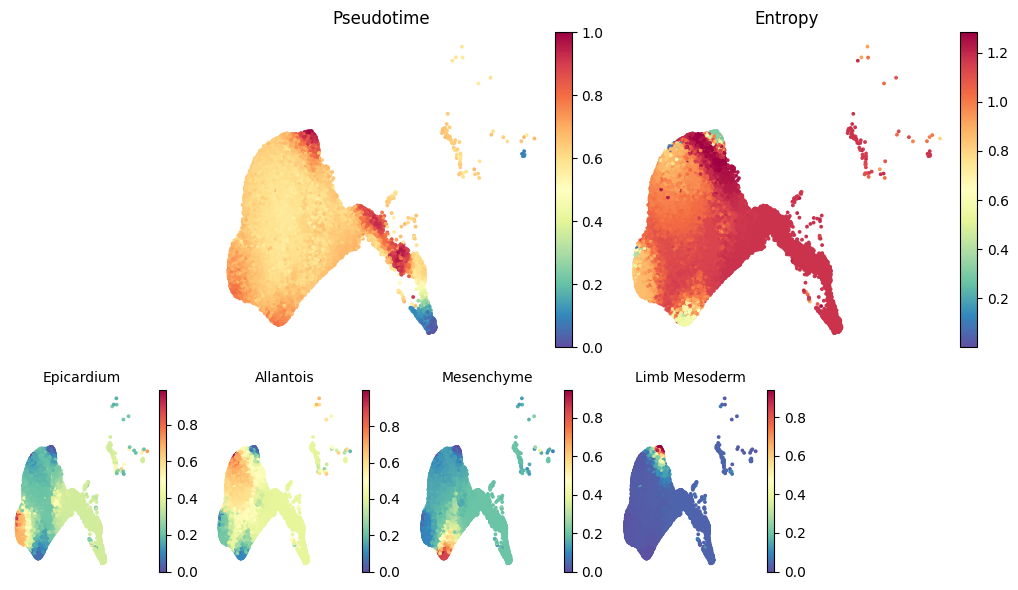

In [38]:
palantir.plot.plot_palantir_results(cmo, s=3)
plt.show()

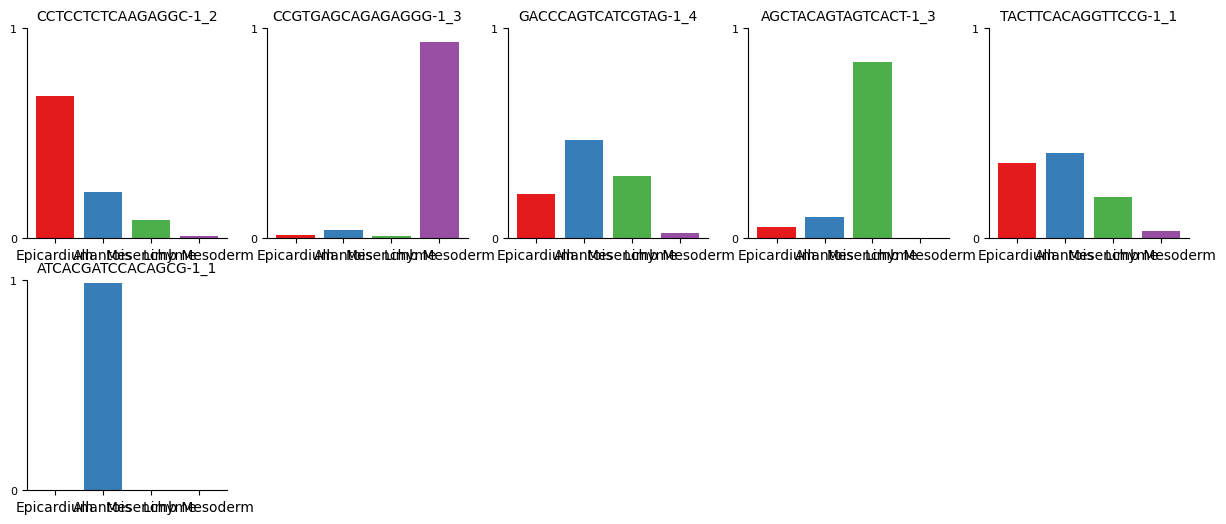

In [39]:
cells =  [
'CCTCCTCTCAAGAGGC-1_2'  ,     #Epic/Mesen 2
'CCGTGAGCAGAGAGGG-1_3' ,   #Limb Mesoderm 2
'GACCCAGTCATCGTAG-1_4'  ,   #  Mesen/Allan
'AGCTACAGTAGTCACT-1_3'  ,    # Mesenchyme 2
'TACTTCACAGGTTCCG-1_1'  ,    #Mesenchyme 1
'ATCACGATCCACAGCG-1_1'        #  Allantois
    ]
palantir.plot.plot_terminal_state_probs(cmo, cells)
plt.show()

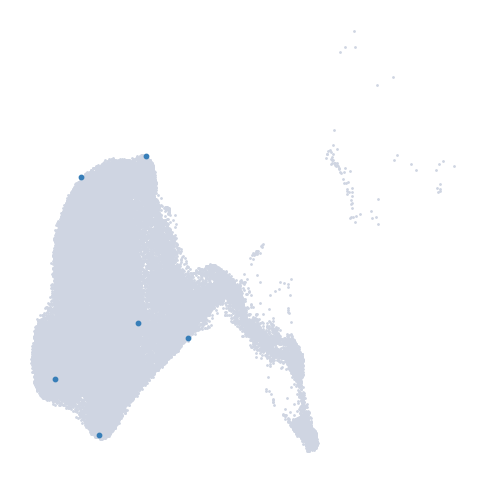

In [40]:
palantir.plot.highlight_cells_on_umap(cmo, cells)
plt.show()

In [41]:
masks = palantir.presults.select_branch_cells(cmo, q=.1, eps=.01)

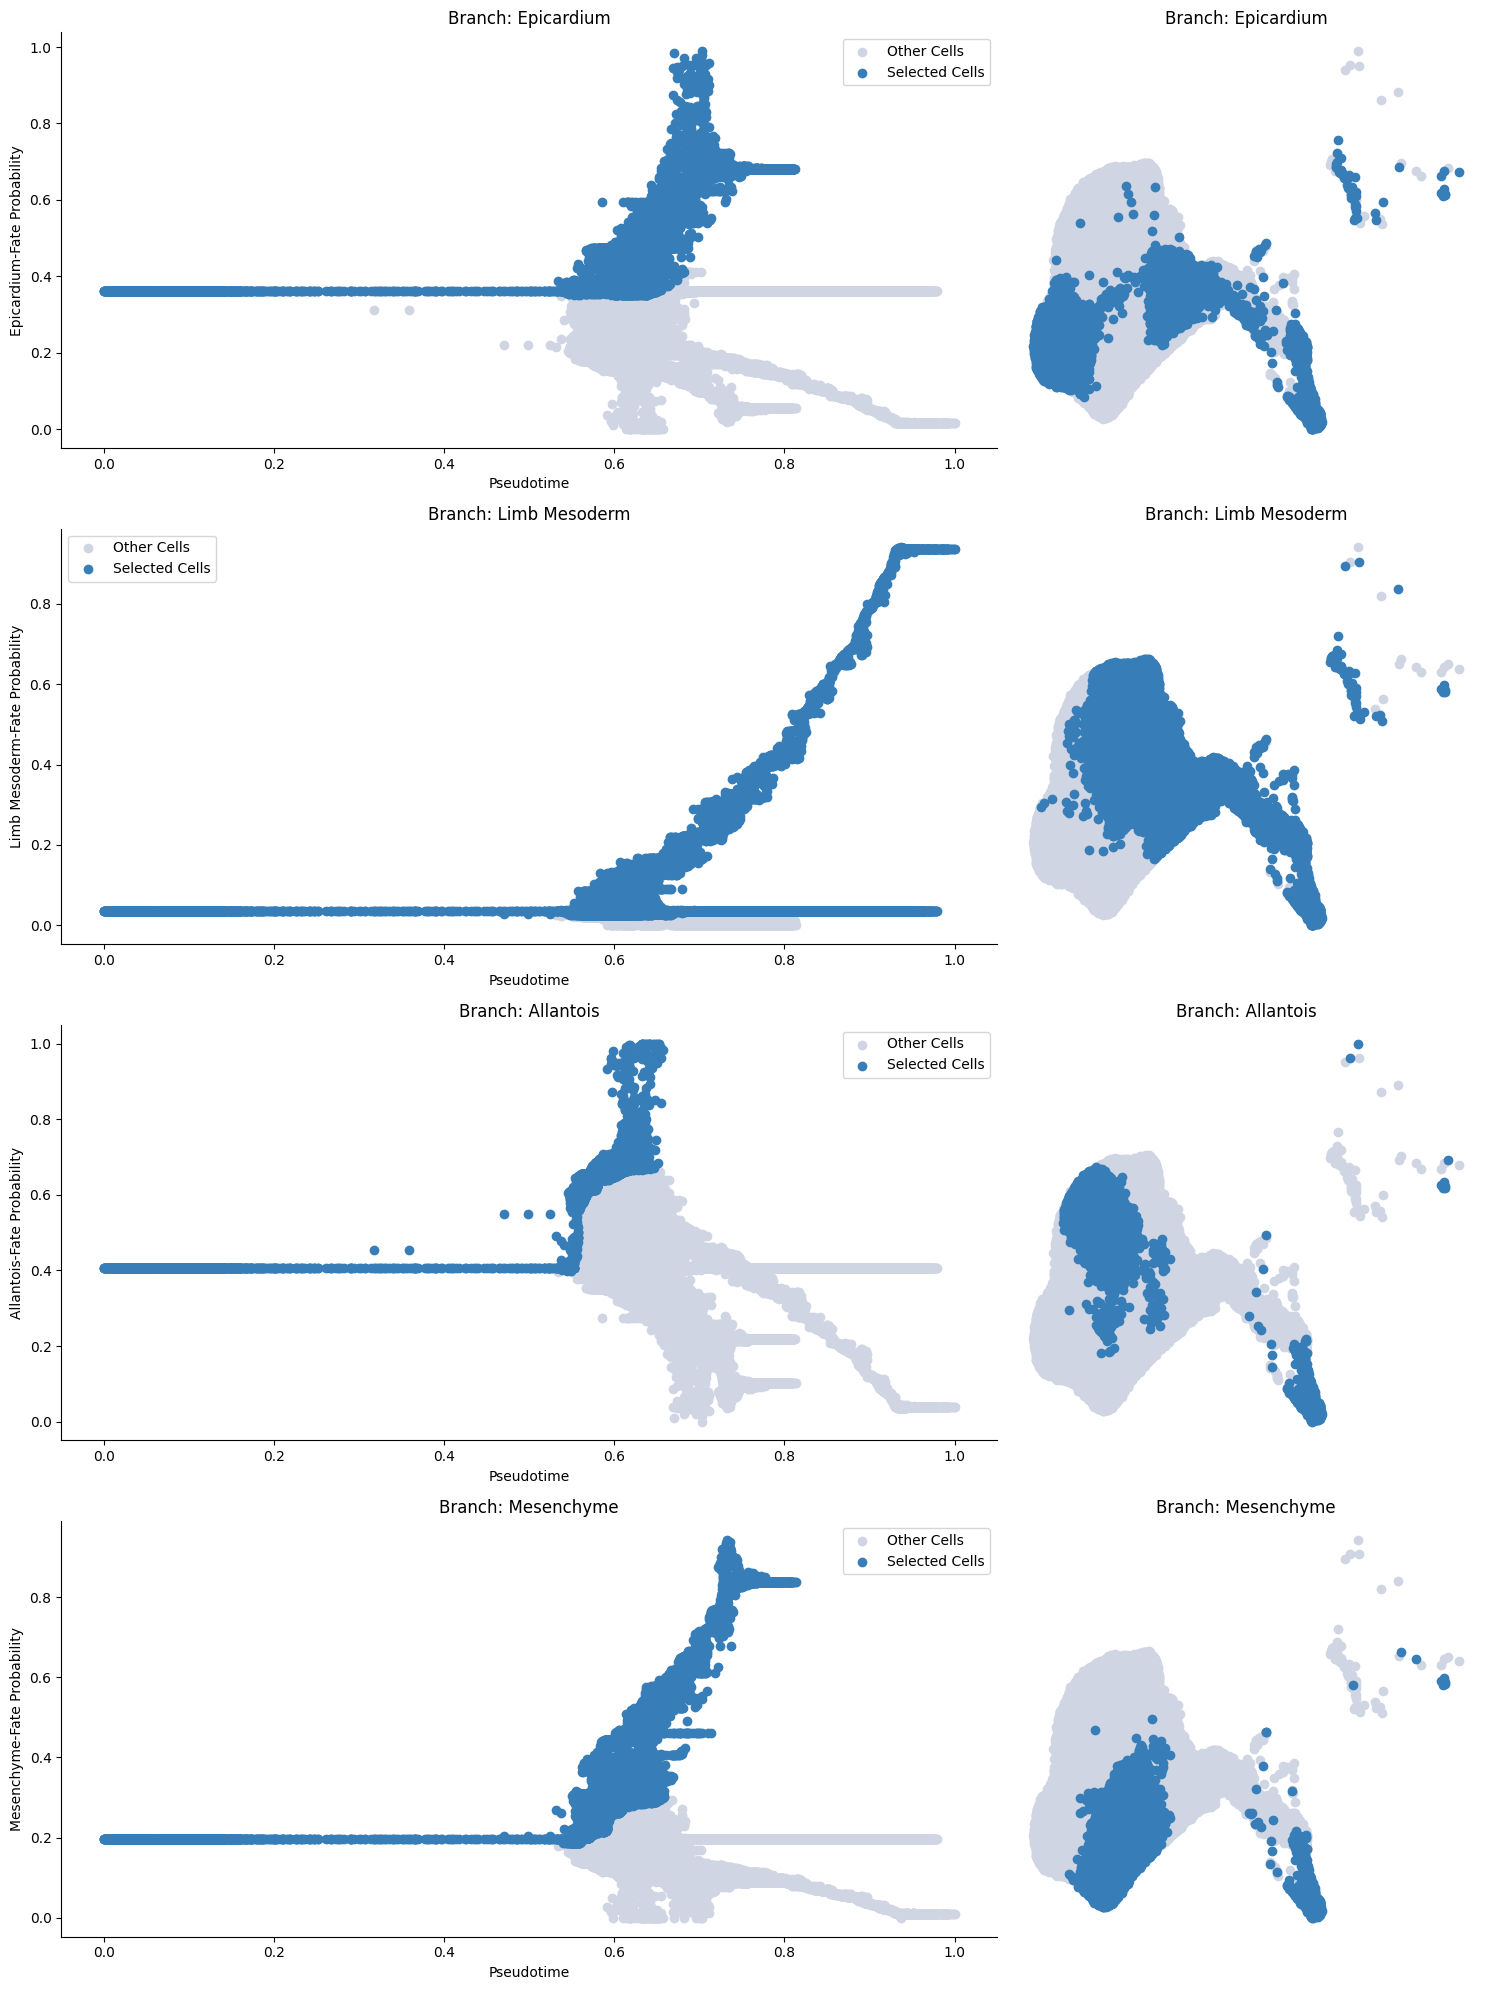

In [42]:
palantir.plot.plot_branch_selection(cmo)
plt.show()

[2025-07-18 16:39:23,976] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (6,337) and rank = 1.0.
[2025-07-18 16:39:23,976] [INFO    ] Using covariance function Matern52(ls=0.3463347256183624).
[2025-07-18 16:39:23,996] [INFO    ] Computing 50 landmarks with k-means clustering (random_state=42).
[2025-07-18 16:39:24,522] [INFO    ] Sigma interpreted as element-wise standard deviation.


<Axes: title={'center': 'Branch: Allantois'}, xlabel='UMAP1', ylabel='UMAP2'>

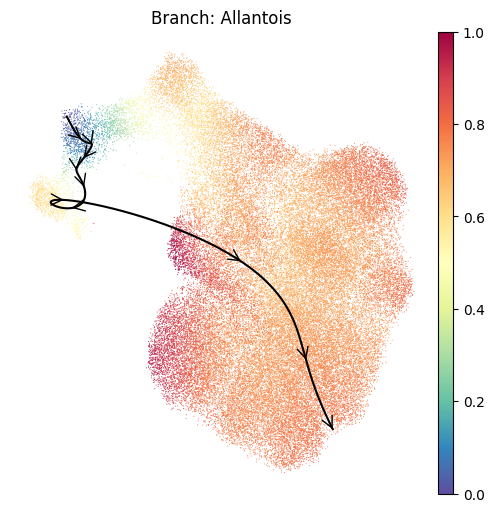

In [590]:
palantir.plot.plot_trajectory(
    cmo,
    "Allantois",
    figsize=(6, 6),
    n_arrows=10,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

[2025-07-18 22:26:45,912] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (12,807) and rank = 1.0.
[2025-07-18 22:26:45,913] [INFO    ] Using covariance function Matern52(ls=0.45515711885221793).
[2025-07-18 22:26:45,926] [INFO    ] Computing 50 landmarks with k-means clustering (random_state=42).
[2025-07-18 22:26:46,905] [INFO    ] Sigma interpreted as element-wise standard deviation.


<Axes: title={'center': 'Branch: Mesenchyme'}, xlabel='UMAP1', ylabel='UMAP2'>

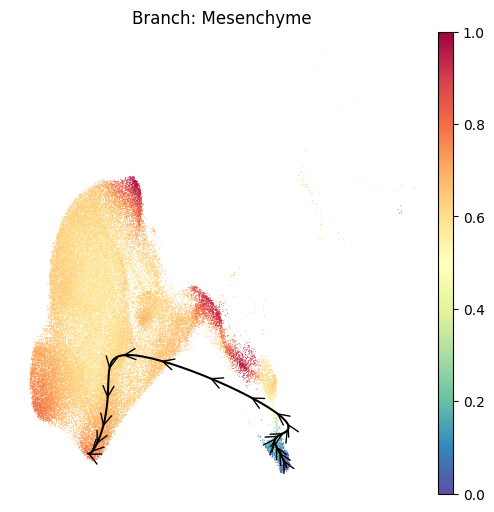

In [43]:
palantir.plot.plot_trajectory(
    cmo,
    "Mesenchyme",
    figsize=(6, 6),
    n_arrows=20,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

In [ ]:
palantir.plot.plot_trajectory(
    cmo,
    "Endothelium",
    figsize=(6, 6),
    n_arrows=20,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

In [ ]:
palantir.plot.plot_trajectory(
    cmo,
    "EMP",
    figsize=(6, 6),
    n_arrows=20,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

In [ ]:
palantir.plot.plot_trajectories(cmo, pseudotime_interval=(0, .9), figsize = (10,10), n_arrows = 20, smoothness = 0.3, scanpy_kwargs={'size': 2})

In [ ]:
gene_trends_cmo = palantir.presults.compute_gene_trends(
    cmo,
    expression_key="MAGIC_imputed_data",
)

In [ ]:
cmo

In [ ]:
genes = ["Atf3", "Zfp711", "Bcl6b"]
palantir.plot.plot_gene_trends(cmo, genes)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_gene_trends

genes = ["Atf3", "Zfp711", "Bcl6b"]

# 1. Draw the multi‐panel gene trends and grab the Figure
fig = plot_gene_trends(cmo, genes)

# 2. Pull out all the Axes
axes = fig.axes

# 3. Get a unified set of handles & labels from the first axes
handles, labels = axes[0].get_legend_handles_labels()

# 4. Build a bigger palette (tab20 has up to 20 distinct colors)
#    Matplotlib ≥3.7 preferred API:
cmap = mpl.colormaps['tab10']
new_colors = [cmap(i) for i in range(len(handles))]

# 5. Recolor each line in every subplot
for ax in axes:
    for line, color in zip(ax.get_lines(), new_colors):
        if line.get_label() in labels:
            line.set_color(color)

# 6. Remove individual legends if present
for ax in axes:
    leg = ax.get_legend()
    if leg is not None:
        ax.get_legend().remove()

# 7. Add one consolidated legend to the right
fig.legend(
    handles, 
    labels, 
    loc='center right', 
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    title='Branches'
)

# 8. Adjust layout to make room for the legend
fig.tight_layout(rect=[0, 0, 0.8, 1])

plt.show()


In [ ]:
palantir.plot.plot_gene_trend_heatmaps(cmo, genes)
plt.show()

In [ ]:
palantir.plot.plot_trend(cmo, branch_name = "EMP", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'Erythroid'
gene   = 'Atf3'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'MkP'
gene   = 'Atf3'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'EMP'
gene   = 'Atf3'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'Endothelium'
gene   = 'Atf3'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'Erythroid'
gene   = 'Zfp711'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'MkP'
gene   = 'Zfp711'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'EMP'
gene   = 'Zfp711'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'Endothelium'
gene   = 'Zfp711'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'Erythroid'
gene   = 'Bcl6b'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'MkP'
gene   = 'Bcl6b'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'EMP'
gene   = 'Bcl6b'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_trend

col = 'cell_type_subclusters_ch'
branch = 'Endothelium'
gene   = 'Bcl6b'

# 1) Make sure your subcluster column is categorical with a 'lightgray' bucket
cts = cmo.obs[col].astype('category')
if 'lightgray' not in cts.cat.categories:
    cts = cts.cat.add_categories(['lightgray'])
cts = cts.fillna('lightgray')
cmo.obs[col] = cts

# 2) Build a color palette dict for every category
cats = cmo.obs[col].cat.categories
cmap = mpl.colormaps['tab20']
palette = {cat: cmap(i) for i, cat in enumerate(cats)}

# 3) Plot trend with every cell colored by subcluster
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch,
    gene=gene,
    position_layer='MAGIC_imputed_data',
    color=col,
    palette=palette,
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize='small',
    figsize=(10, 4),
)

# 4) Count how many cells per subcluster are on the MkP branch
mask  = cmo.obsm['branch_masks'][branch] > 0
counts = cmo.obs.loc[mask, col].value_counts()

# 5) Only keep subclusters with ≥50 cells
keep = counts[counts >= 10].sort_values(ascending=False).index.tolist()

# 6) Locate which Axes currently has the legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 7) Grab its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 8) Filter out labels not in our keep list
new_handles = [h for h, lab in zip(handles, labels) if lab in keep]
new_labels  = [lab for lab in labels                 if lab in keep]

# 9) Remove the old legend
legend_ax.get_legend().remove()

# 10) Draw a new, two‑column legend for subclusters ≥50 cells
fig.legend(
    new_handles,
    new_labels,
    title=f'Subcluster (n≥10 in {branch})',
    loc='center right',
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize='small',
    ncol=2
)

# 11) Expand the right margin so it fits
fig.subplots_adjust(right=0.75)

plt.show()


In [ ]:
more_genes = cmo.var_names[:5000]
more_genes

In [ ]:
communities = palantir.presults.cluster_gene_trends(cmo, "Erythroid", more_genes)

In [ ]:
palantir.plot.plot_gene_trend_clusters(cmo, "Erythroid")
plt.show()

In [ ]:
cmo

In [ ]:
communities = palantir.presults.cluster_gene_trends(cmo, "EMP", more_genes)
palantir.plot.plot_gene_trend_clusters(cmo, "EMP")
plt.show()

In [ ]:
communities = palantir.presults.cluster_gene_trends(cmo, "Endothelium", more_genes)
palantir.plot.plot_gene_trend_clusters(cmo, "Endothelium")
plt.show()

In [ ]:
communities = palantir.presults.cluster_gene_trends(cmo, "MkP", more_genes)
palantir.plot.plot_gene_trend_clusters(cmo, "MkP")
plt.show()

In [ ]:
# If you have a raw layer, drop the offending column there too
if cmo.raw is not None:
    # Make sure raw.var is a DataFrame, then drop '_index' if present
    raw_var = cmo.raw.var
    if '_index' in raw_var.columns:
        raw_var.drop(columns=['_index'], inplace=True)
        # re‐assign back just in case
        cmo.raw.var = raw_var

# Also drop from var (you already did this, but repeat safely)
if '_index' in cmo.var.columns:
    cmo.var.drop(columns=['_index'], inplace=True)

# Now write without error
cmo.write_h5ad(
    "cmov3_postpalantir_mesoderm_lineages.h5ad",
    compression=None
)


In [ ]:
cmo.obsm['X_umap'] = cmo.obsm['X_UMAP']

In [ ]:
palantir.plot.plot_palantir_results(cmo, s=3)
plt.show()

In [ ]:
palantir.plot.plot_branch_selection(cmo)
plt.show()

In [ ]:
cmo.obsm['X_pca'] = cmo.obsm['X_PCA']

In [ ]:
cmo

In [ ]:
sc.pl.umap(
    cmo,
    color='cell_type_subclusters_ch',
    legend_loc=None,
    title='UMAP of Selected Cell Types'
)

In [ ]:
sc.pl.umap(
    cmo,
    color='cell_type_subclusters_ch',
    legend_loc='right margin',
    title='UMAP of Selected Cell Types'
)


# Run diffusion maps

In [ ]:
# Run diffusion maps
dm_res = palantir.utils.run_diffusion_maps(cmo, n_components = 5)

In [ ]:
ms_data = palantir.utils.determine_multiscale_space(cmo)

In [ ]:
imputed_X = palantir.utils.run_magic_imputation(cmo,n_jobs=16)

In [ ]:
cmo

In [ ]:
cmo.layers['MAGIC_imputed_data']

In [ ]:
imputed_X

In [ ]:
sc.pl.embedding(
    cmo,
    basis="X_UMAP",
    layer="MAGIC_imputed_data",
    color=["Gata1", "Eomes", "T", "Cdh5", "Ptprc"],
    frameon=False,
    ncols=5
)
plt.show()

In [ ]:
sc.pl.embedding(
    cmo,
    basis="X_UMAP",
    layer="MAGIC_imputed_data",
    color=["Atf3", "Zfp711", "Bcl6b"],
    frameon=False,
)
plt.show()

In [ ]:
palantir.plot.plot_diffusion_components(cmo)
plt.show()

In [ ]:
terminal_states_cmo = pd.Series(
    [
        "EMP",
       # "MkP",
        "Erythroid",
        "Endothelium",
      #  "Endocardium",
        "Mesenchyme",
        "Allantois",
        "Epicardium",
        "Limb Mesoderm",
    ],
    [
        'TAAGTCGTCCTCTGCA-1_1',  # EMP
      #  'ATCCGTCCACAGAGCA-1_2',  # MkP
        'ATAGACCGTGCCGGTT-1_1',  # Erythroid
        'TACTTACCATGTAACC-1_2',   # YS Endothelium
        #'AGAGCAGCAAGGCGTA-1_1',  # Endocardium
        'CAATCGACAGTGGTGA-1_1',  # Mesenchyme
        'ATCACGATCCACAGCG-1_1',  # Allantois
        'AGGTAGGCACCCAACG-1_1',    # Epicardium
        'CTCCCAAAGCGGACAT-1_1',  # Limb Mesoderm
    ]
)

In [ ]:
palantir.plot.highlight_cells_on_umap(
    cmo,
    list(terminal_states_cmo.index),  # <-- just the cell IDs
    s=1,                # background dot size
    s_highlighted=50,   # highlighted dot size
    figsize=(6, 6)
)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. pull out your UMAP coords as a DataFrame
umap_df = (
    pd.DataFrame(
        cmo.obsm['X_umap'],
        index=cmo.obs_names,
        columns=['x','y']
    )
)

fig, ax = plt.subplots(figsize=(6, 6))

# 2. plot all cells in light gray
ax.scatter(
    umap_df['x'], umap_df['y'],
    s=1, color='lightgray'
)

# 3. overlay each terminal‐state cell in red + add its label
for cell, label in terminal_states_cmo.items():
    if cell not in umap_df.index:
        continue
    x, y = umap_df.loc[cell, ['x','y']]
    ax.scatter(x, y, s=50, color='red')
    ax.text(
        x + 0.5, y + 0.5,        # small offset in data‐units
        label,
        fontsize=8,
        weight='bold'
    )

ax.set_axis_off()
plt.tight_layout()
plt.show()


In [ ]:

palantir.plot.highlight_cells_on_umap(cmo, terminal_states_cmo)
plt.show()

In [ ]:
start_cell = "CTAACTTAGGTGCTTT-1_4"
pr_res = palantir.core.run_palantir(
    cmo, start_cell,  terminal_states=terminal_states_cmo
)

In [ ]:
start =  pd.Series(['start'],["CTAACTTAGGTGCTTT-1_4"])

In [ ]:


palantir.plot.highlight_cells_on_umap(cmo, start)
plt.show()

In [ ]:
terminal_states_cmo

In [ ]:
cells_cmo_end =      [
        'TAAGTCGTCCTCTGCA-1_1',  # EMP
        'ATCCGTCCACAGAGCA-1_2',  # MkP
        'ATAGACCGTGCCGGTT-1_1',  # Erythroid
        'TACTTACCATGTAACC-1_2',   # YS Endothelium
        'AGAGCAGCAAGGCGTA-1_1',  # Endocardium
        'CAATCGACAGTGGTGA-1_1',  # Mesenchyme
        'ATCACGATCCACAGCG-1_1',  # Allantois
        'AGGTAGGCACCCAACG-1_1',    # Epicardium
        'CTCCCAAAGCGGACAT-1_1',  # Limb Mesoderm
    ]
palantir.plot.plot_terminal_state_probs(cmo, cells_cmo_end)
plt.show()

In [ ]:
masks_cmo = palantir.presults.select_branch_cells(cmo, q=.01, eps=.01)

In [ ]:
palantir.plot.plot_branch_selection(cmo)
plt.show()

In [ ]:
palantir.plot.plot_trajectory(cmo, "EMP",figsize = (6,6), n_arrows = 10, smoothness = 0.3, scanpy_kwargs={'size': 2} )

In [ ]:
palantir.plot.plot_trajectory(cmo, "MkP",figsize = (6,6), n_arrows = 10, smoothness = 0.3, scanpy_kwargs={'size': 2} )

In [ ]:
palantir.plot.plot_trajectory(cmo, "Erythroid",figsize = (6,6), n_arrows = 10, smoothness = 0.3, scanpy_kwargs={'size': 2} )

In [ ]:
palantir.plot.plot_trajectory(cmo, "Endothelium",figsize = (6,6), n_arrows = 10, smoothness = 0.3, scanpy_kwargs={'size': 2} )

In [ ]:
palantir.plot.plot_trajectory(cmo, "Endocardium",figsize = (6,6), n_arrows = 10, smoothness = 0.3, scanpy_kwargs={'size': 2} )

In [ ]:
palantir.plot.plot_trajectory(cmo, "Mesenchyme",figsize = (6,6), n_arrows = 10, smoothness = 0.3, scanpy_kwargs={'size': 2} )

In [ ]:
palantir.plot.plot_trajectory(cmo, "Allantois",figsize = (6,6), n_arrows = 10, smoothness = 0.3, scanpy_kwargs={'size': 2} )

In [ ]:
palantir.plot.plot_trajectory(cmo, "Epicardium",figsize = (6,6), n_arrows = 10, smoothness = 0.3, scanpy_kwargs={'size': 2} )

In [ ]:
palantir.plot.plot_trajectory(cmo, "Limb Mesoderm",figsize = (6,6), n_arrows = 10, smoothness = 0.3, scanpy_kwargs={'size': 2} )

In [ ]:
palantir.plot.plot_trajectories(cmo, pseudotime_interval=(0, .9), figsize = (10,10), n_arrows = 5, smoothness = 0.3, scanpy_kwargs={'size': 2})

In [ ]:
palantir.plot.plot_trajectory(
    cmo,
    "EMP",
    figsize=(6, 6),
    n_arrows=10,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

In [ ]:
palantir.plot.plot_trajectory(
    cmo,
    "MkP",
    figsize=(6, 6),
    n_arrows=10,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

[2025-07-18 11:40:00,177] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (6,156) and rank = 1.0.
[2025-07-18 11:40:00,178] [INFO    ] Using covariance function Matern52(ls=0.46586090326309204).
[2025-07-18 11:40:00,208] [INFO    ] Computing 50 landmarks with k-means clustering (random_state=42).
[2025-07-18 11:40:00,818] [INFO    ] Sigma interpreted as element-wise standard deviation.


<Axes: title={'center': 'Branch: Erythroid'}, xlabel='UMAP1', ylabel='UMAP2'>

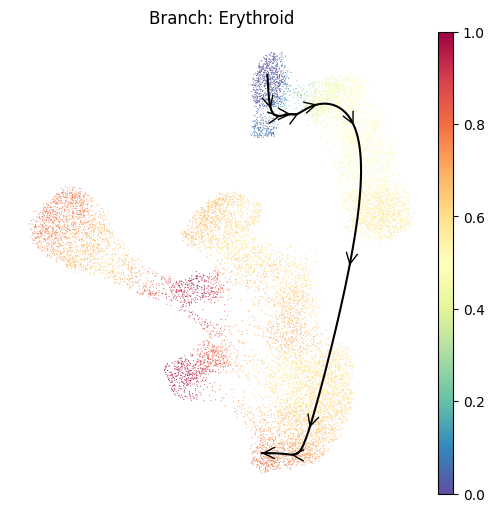

In [360]:
palantir.plot.plot_trajectory(
    cmo,
    "Erythroid",
    figsize=(6, 6),
    n_arrows=10,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

In [ ]:
palantir.plot.plot_trajectory(
    cmo,
    "YS Endothelium",
    figsize=(6, 6),
    n_arrows=10,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

In [ ]:
palantir.plot.plot_trajectory(
    cmo,
    "Endocardium",
    figsize=(6, 6),
    n_arrows=10,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

In [ ]:
palantir.plot.plot_trajectory(
    cmo,
    "YS Mesothelium",
    figsize=(6, 6),
    n_arrows=10,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

In [ ]:
palantir.plot.plot_trajectory(
    cmo,
    "Mesenchyme",
    figsize=(6, 6),
    n_arrows=10,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

In [ ]:
palantir.plot.plot_trajectory(
    cmo,
    "Allantois",
    figsize=(6, 6),
    n_arrows=10,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

In [359]:
palantir.plot.plot_trajectory(
    cmo,
    "Epicardium",
    figsize=(6, 6),
    n_arrows=10,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

TypeError: exceptions must derive from BaseException

In [ ]:
palantir.plot.plot_trajectory(
    cmo,
    "Cardiomyocytes",
    figsize=(6, 6),
    n_arrows=10,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

In [ ]:
palantir.plot.plot_trajectory(
    cmo,
    "Limb Mesoderm",
    figsize=(6, 6),
    n_arrows=10,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

In [ ]:
palantir.plot.plot_trajectory(
    cmo,
    "LP Mesoderm",
    figsize=(6, 6),
    n_arrows=10,
    smoothness=0.3,
    cell_color="palantir_pseudotime",        # anything ≠ 'branch_selection'
    scanpy_kwargs={'size': 2}                # now this will be applied
)

In [ ]:
gene_trends_cmo = palantir.presults.compute_gene_trends(
    cmo,
    expression_key="MAGIC_imputed_data",
)

In [ ]:
cmo

In [ ]:
genes = ["Atf3", "Zfp711", "Bcl6b"]
palantir.plot.plot_gene_trends(cmo, genes)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from palantir.plot import plot_gene_trends

genes = ["Atf3", "Zfp711", "Bcl6b"]

# 1. Draw the multi‐panel gene trends and grab the Figure
fig = plot_gene_trends(cmo, genes)

# 2. Pull out all the Axes
axes = fig.axes

# 3. Get a unified set of handles & labels from the first axes
handles, labels = axes[0].get_legend_handles_labels()

# 4. Build a bigger palette (tab20 has up to 20 distinct colors)
#    Matplotlib ≥3.7 preferred API:
cmap = mpl.colormaps['tab20']
new_colors = [cmap(i) for i in range(len(handles))]

# 5. Recolor each line in every subplot
for ax in axes:
    for line, color in zip(ax.get_lines(), new_colors):
        if line.get_label() in labels:
            line.set_color(color)

# 6. Remove individual legends if present
for ax in axes:
    leg = ax.get_legend()
    if leg is not None:
        ax.get_legend().remove()

# 7. Add one consolidated legend to the right
fig.legend(
    handles, 
    labels, 
    loc='center right', 
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    title='Branches'
)

# 8. Adjust layout to make room for the legend
fig.tight_layout(rect=[0, 0, 0.8, 1])

plt.show()


In [ ]:
palantir.plot.plot_gene_trend_heatmaps(cmo, genes)
plt.show()

In [ ]:
palantir.plot.plot_trend(cmo, branch_name = "EMP", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

In [ ]:
palantir.plot.plot_trend(cmo, branch_name = "MkP", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

In [ ]:
palantir.plot.plot_trend(cmo, branch_name = "Erythroid", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

In [ ]:
palantir.plot.plot_trend(cmo, branch_name = "YS Endothelium", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

In [ ]:
palantir.plot.plot_trend(cmo, branch_name = "Endocardium", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

In [ ]:
palantir.plot.plot_trend(cmo, branch_name = "YS Mesothelium", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

In [ ]:
palantir.plot.plot_trend(cmo, branch_name = "Mesenchyme", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

In [ ]:
palantir.plot.plot_trend(cmo, branch_name = "Allantois", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

In [ ]:
palantir.plot.plot_trend(cmo, branch_name = "Epicardium", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

In [ ]:
palantir.plot.plot_trend(cmo, branch_name = "Cardiomyocytes", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

In [ ]:
palantir.plot.plot_trend(cmo, branch_name = "Limb Mesoderm", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

In [ ]:
palantir.plot.plot_trend(cmo, branch_name = "LP Mesoderm", gene = "Atf3", position_layer="MAGIC_imputed_data")
plt.show()

In [ ]:
# Get a numpy array of the unique values
celltype_extended_cmo = cmo.obs['cell_type_subclusters_ch'].unique()
print(celltype_extended_cmo)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "EMP"
gene        = "Atf3"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.9)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "MkP"
gene        = "Atf3"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.9)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Erythroid"
gene        = "Atf3"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "YS Endothelium"
gene        = "Atf3"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Mesenchyme"
gene        = "Atf3"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Allantois"
gene        = "Atf3"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Epicardium"
gene        = "Atf3"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Cardiomyocytes"
gene        = "Atf3"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Limb Mesoderm"
gene        = "Atf3"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "LP Mesoderm"
gene        = "Atf3"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


# Zfp711

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "EMP"
gene        = "Zfp711"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.9)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "MkP"
gene        = "Zfp711"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.9)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Erythroid"
gene        = "Zfp711"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "YS Endothelium"
gene        = "Zfp711"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Mesenchyme"
gene        = "Zfp711"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Allantois"
gene        = "Zfp711"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Epicardium"
gene        = "Zfp711"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Cardiomyocytes"
gene        = "Zfp711"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Limb Mesoderm"
gene        = "Zfp711"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "LP Mesoderm"
gene        = "Zfp711"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


# Bcl6b

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "EMP"
gene        = "Bcl6b"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.9)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "MkP"
gene        = "Bcl6b"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.9)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Erythroid"
gene        = "Bcl6b"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "YS Endothelium"
gene        = "Bcl6b"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Mesenchyme"
gene        = "Bcl6b"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Allantois"
gene        = "Bcl6b"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Epicardium"
gene        = "Bcl6b"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Cardiomyocytes"
gene        = "Bcl6b"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "Limb Mesoderm"
gene        = "Bcl6b"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from palantir.plot import plot_trend

branch_name = "LP Mesoderm"
gene        = "Bcl6b"

# 1) Draw your plot and grab fig & ax
fig, ax_primary = plot_trend(
    cmo,
    branch_name=branch_name,
    gene=gene,
    position_layer="MAGIC_imputed_data",
    color="celltype_extended_cmo",
    palette="tab20",
    nticks=3,
    legend_anchor=(1.2, 0.5),
    legend_fontsize="small",
    figsize=(10, 4),
)

# 2) Compute mask & counts for cells on that branch
branch_masks = cmo.obsm['branch_masks']
mask         = branch_masks[branch_name] > 0
counts = cmo.obs.loc[mask, 'celltype_extended_cmo'].value_counts()

# 3) Decide which cell‑types to keep (n>=10), in descending order
keep_cts = counts[counts >= 50].sort_values(ascending=False).index.tolist()

# 4) Locate the Axes that has the old legend
legend_ax = next(ax for ax in fig.axes if ax.get_legend() is not None)

# 5) Pull its handles & labels
handles, labels = legend_ax.get_legend_handles_labels()

# 6) Filter them
new_handles = []
new_labels  = []
for h, lab in zip(handles, labels):
    if lab in keep_cts:
        new_handles.append(h)
        new_labels.append(lab)

# 7) Remove the old legend
legend_ax.get_legend().remove()

# 8) Draw a fresh, two‑column legend on the figure
fig.legend(
    new_handles,
    new_labels,
    title="Cell Type (n≥50)",
    loc="center right",
    bbox_to_anchor=(1.2, 0.5),
    frameon=False,
    fontsize="small",
    ncol=1,
    columnspacing=0.8,
    handletextpad=0.5
)

# 9) Give it room
fig.subplots_adjust(right=0.85)

plt.show()


# Clustering - Gene Expression

In [ ]:
more_genes = cmo.var_names[:5000]
more_genes

In [ ]:
communities = palantir.presults.cluster_gene_trends(cmo, "Erythroid", more_genes)

In [ ]:
palantir.plot.plot_gene_trend_clusters(cmo, "Erythroid")
plt.show()

In [ ]:
cmo

In [ ]:
communities = palantir.presults.cluster_gene_trends(cmo, "EMP", more_genes)
palantir.plot.plot_gene_trend_clusters(cmo, "EMP")
plt.show()

In [ ]:
communities = palantir.presults.cluster_gene_trends(cmo, "YS Endothelium", more_genes)
palantir.plot.plot_gene_trend_clusters(cmo, "YS Endothelium")
plt.show()

# Save

In [ ]:
# write to an uncompressed .h5ad
cmo.write_h5ad("cmov3_postpalantir.h5ad")